# Regular Expressions

## Regular expressions are text patterns that define the form a text string should have.

## A regular expression is a pattern of text that consists of ordinary characters (for example, letters a through z or numbers 0 through 9) known as literals and special characters known as metacharacters. This pattern describes the strings that would match when applied to a text.


## No modern programming language can be called complete until it supports regular expressions.

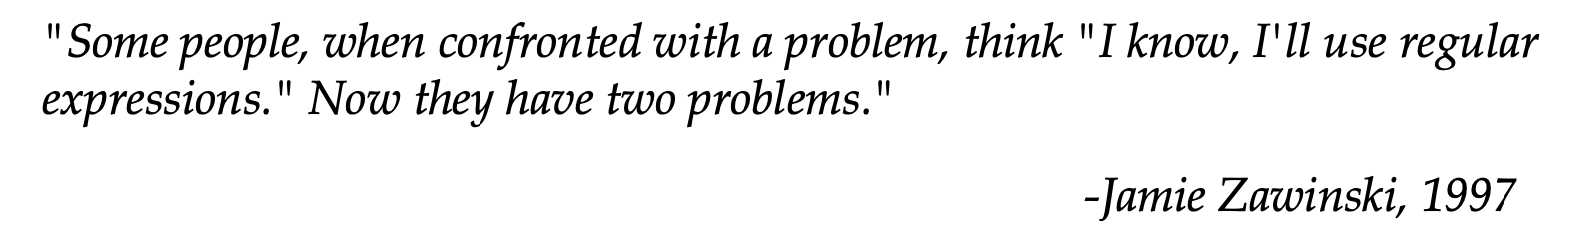

## Ken Thompson, known for the design and implementation of Unix, the B programming language, the UTF-8 encoding, and others, extended earlier works on regular expressions and wrote the paper ' Regular Expression Search Algorithm'.


## Ken Thompson and his colleagues modified QED (Quick Editor) at Bell Labs to support regular expressions. To search with a regular expression in QED, the following had to be written:

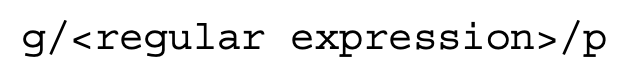


## In the preceding line of code, g means global search and p means print. If, instead of writing regular expression, we write the short form re, we get g/re/p, and therefore, the beginnings of the venerable UNIX command-line tool grep.

## Perl pushed the regular expressions to the mainstream. The implementation in Perl went forward and added many modifications to the original regular expression syntax, creating the so-called Perl flavor. Many of the later implementations in the rest of the languages or tools are based on the Perl flavor of regular expressions.

## The IEEE has applied their POSIX (Portable Operating System Interface) standard to give better Unicode support to the regular expression syntax and behaviors. This is called the POSIX flavor of the regular expressions.

## Today, the standard Python module for regular expressions—re—supports only Perl-style regular expressions. 

## There is an effort to write a new regex module with better POSIX style support at https://pypi.python.org/pypi/regex. 

## This new module is intended to replace Python's re module implementation eventually. 

## We will study the standard re module in Python. 

## A regular expression is a pattern of text that consists of ordinary characters (for example, letters a through z or numbers 0 through 9) known as literals and special characters known as metacharacters. This pattern describes the strings that would match when applied to a text.


# Literals

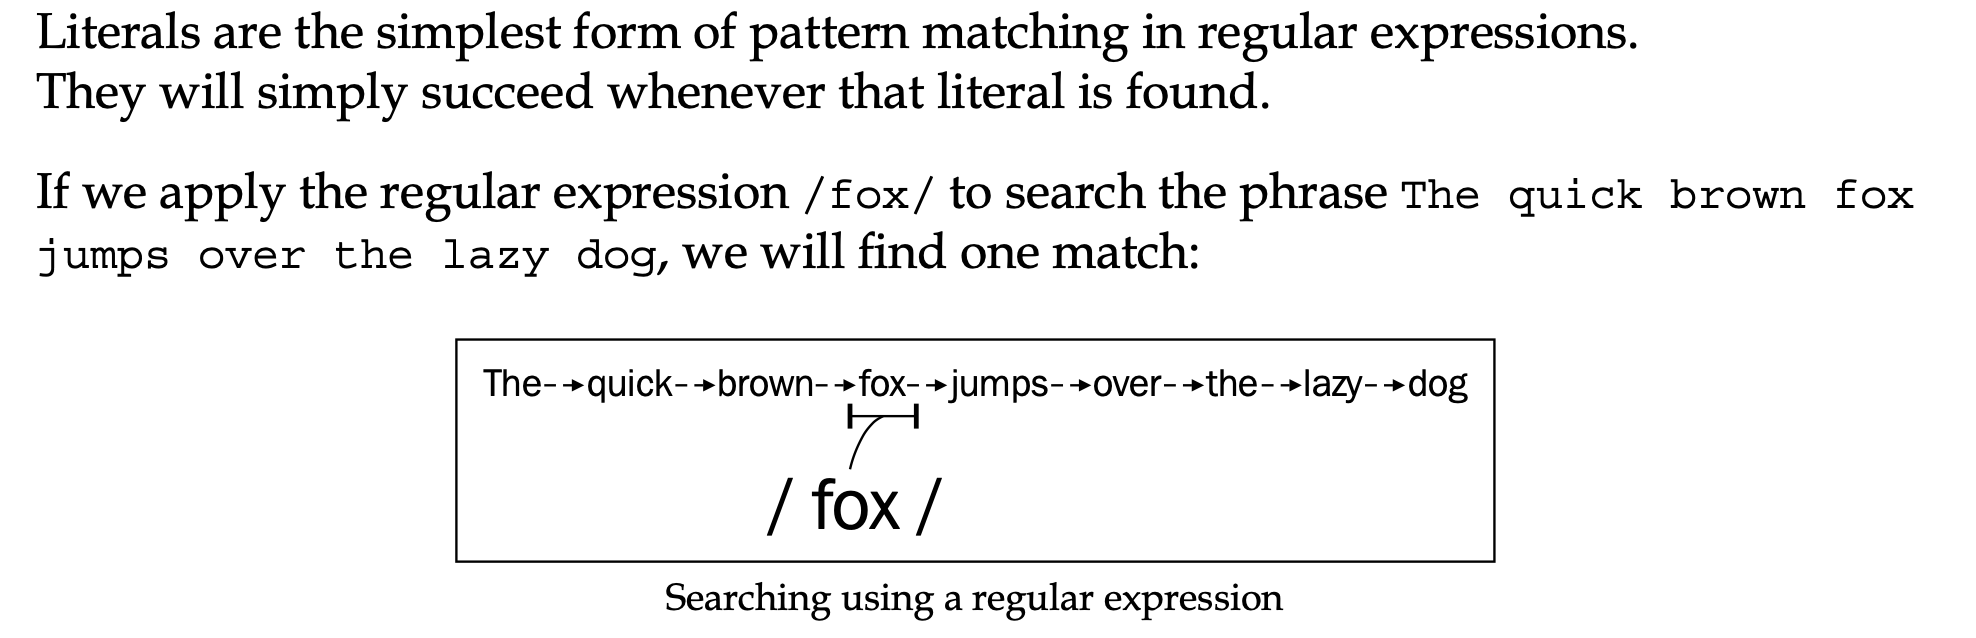


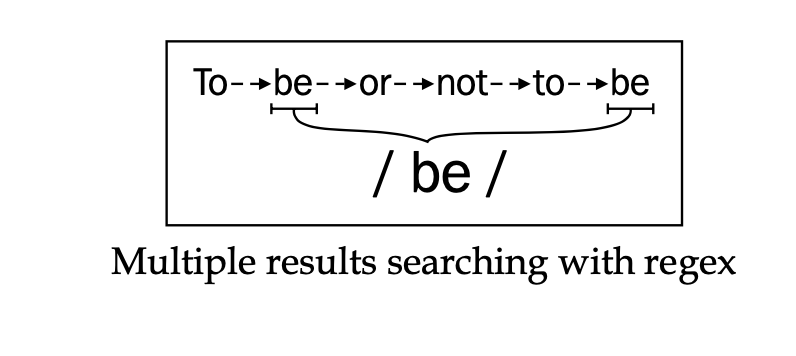

## If we apply the expression /(this is inside)/ to search the below text, we will find that the parentheses are not included in the result. This happens because parentheses are metacharacters and they have a special meaning.

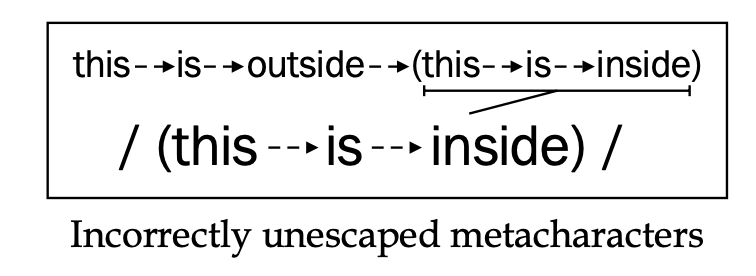

## Solution: Escape the metacharacters by preceding them with a backslash

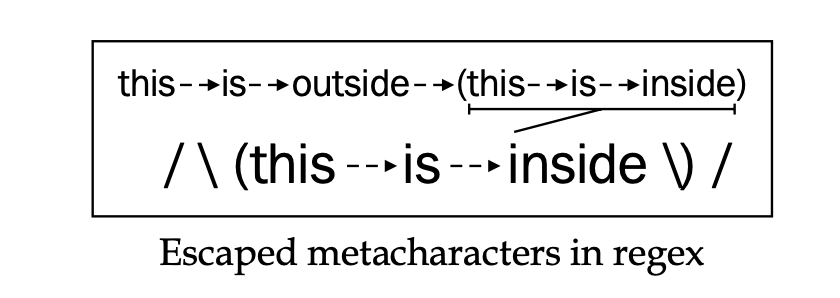

## In regular expressions, there are twelve metacharacters that should be escaped if they are to be used with their literal meaning:

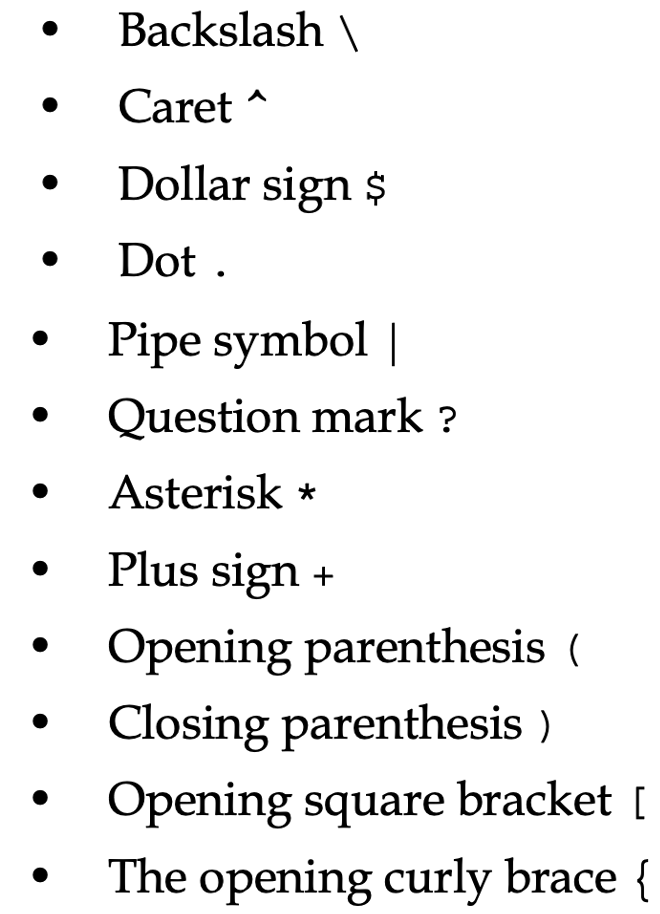

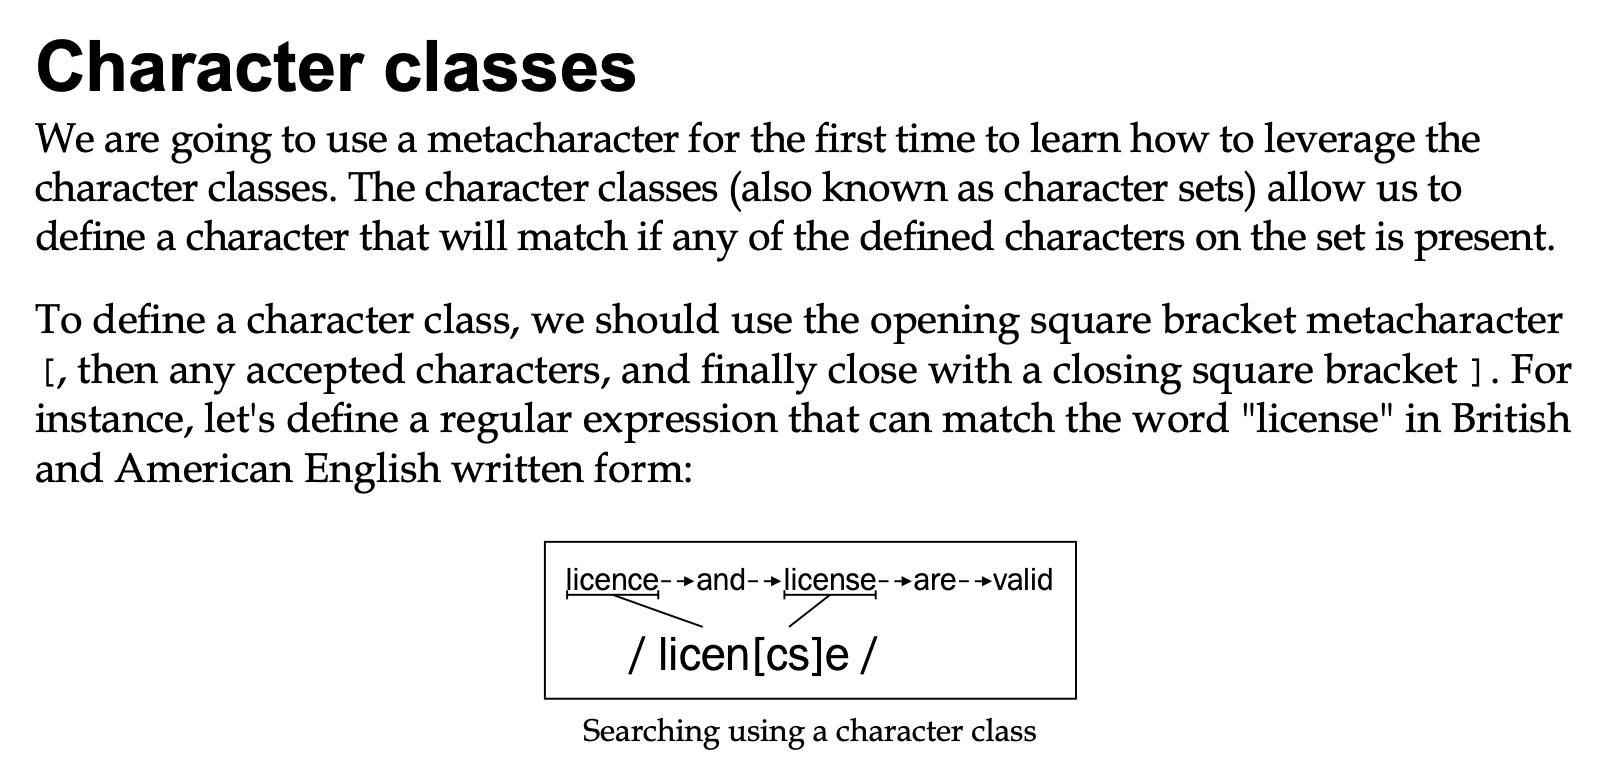

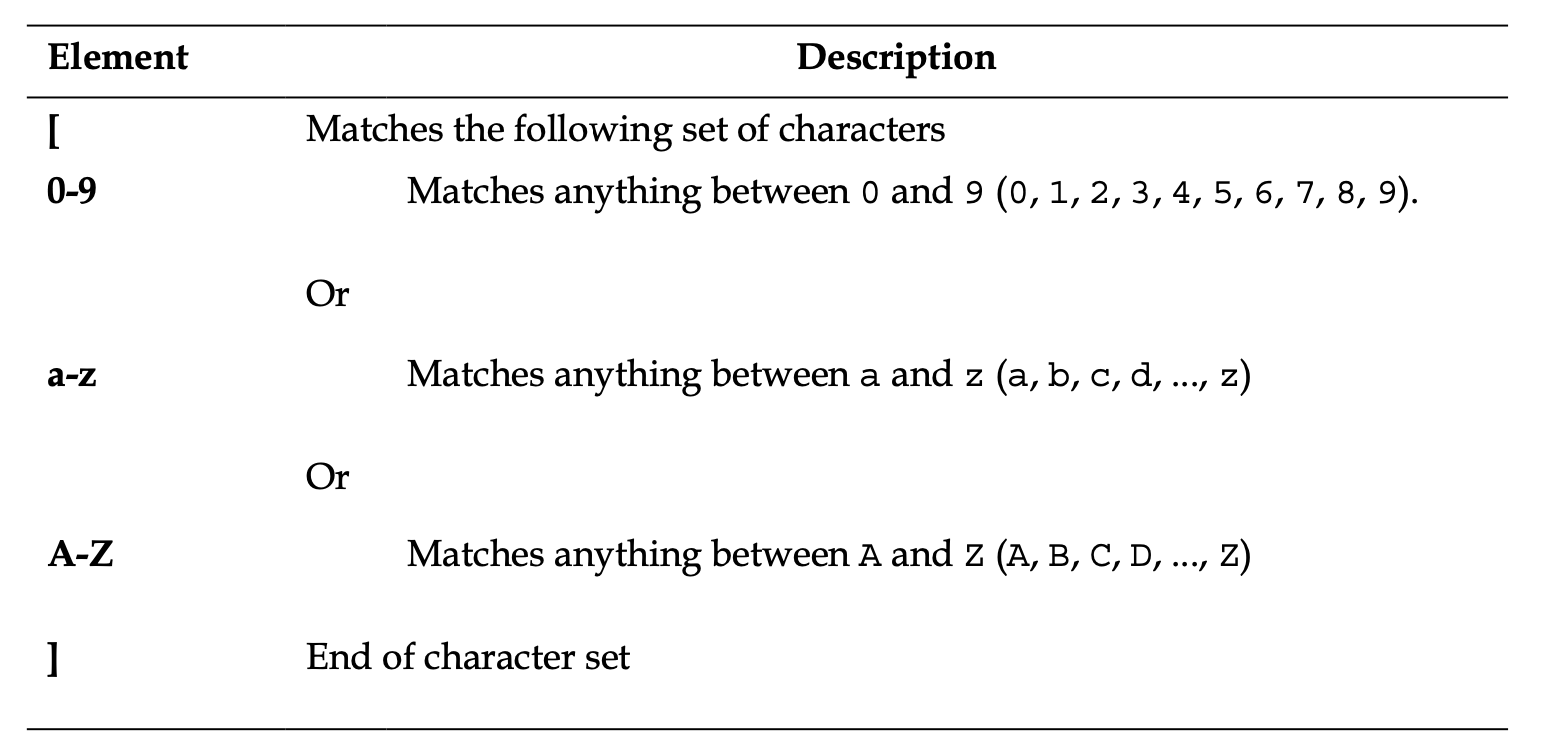

In [ ]:
/pra[0aAz]ty/
pra0ty
praaty
praAty
prazty

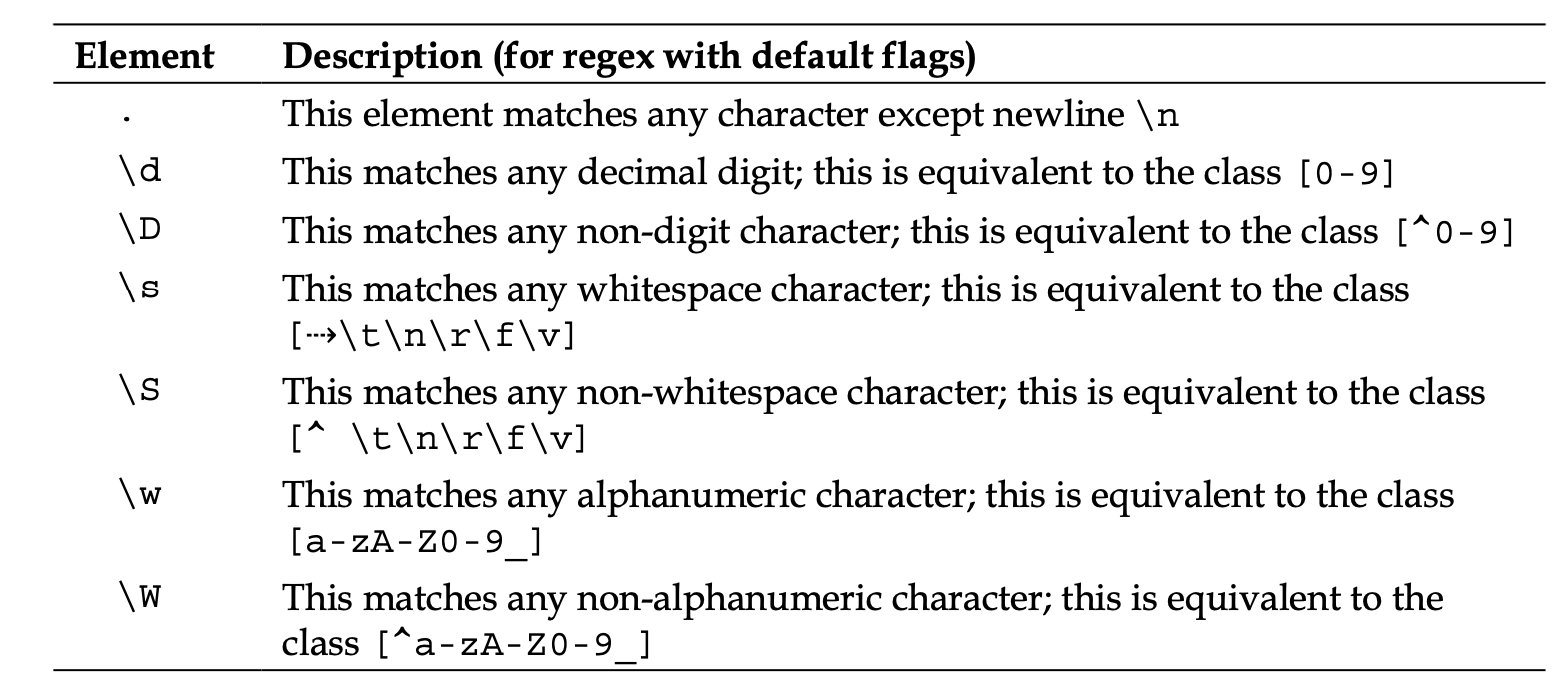

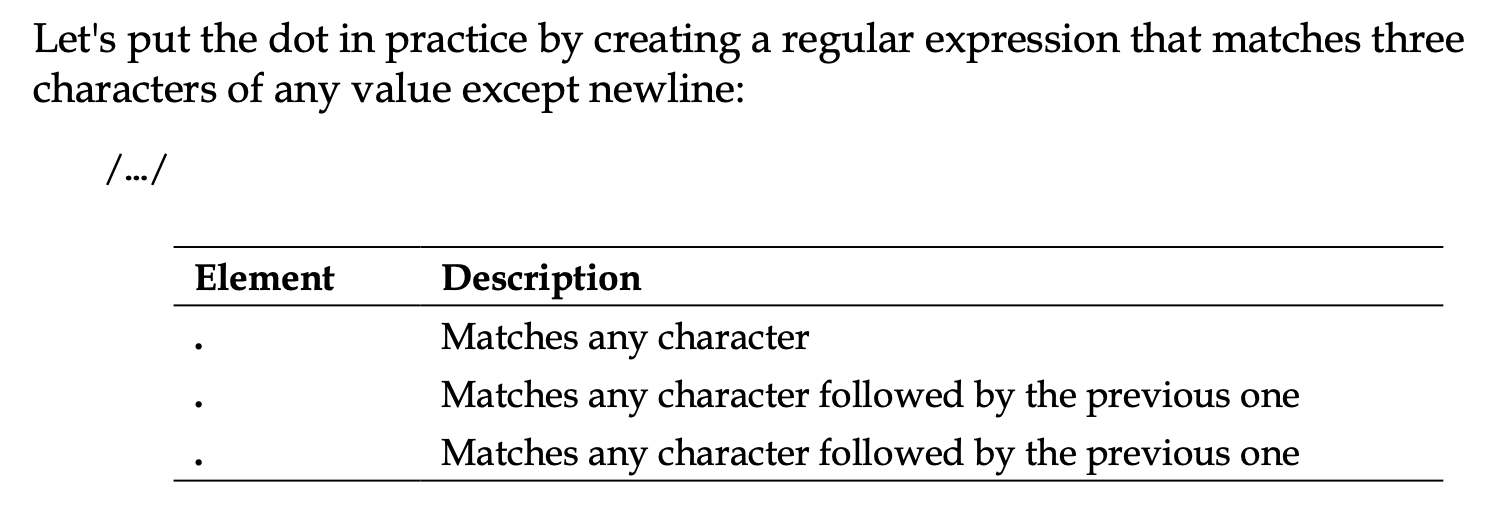

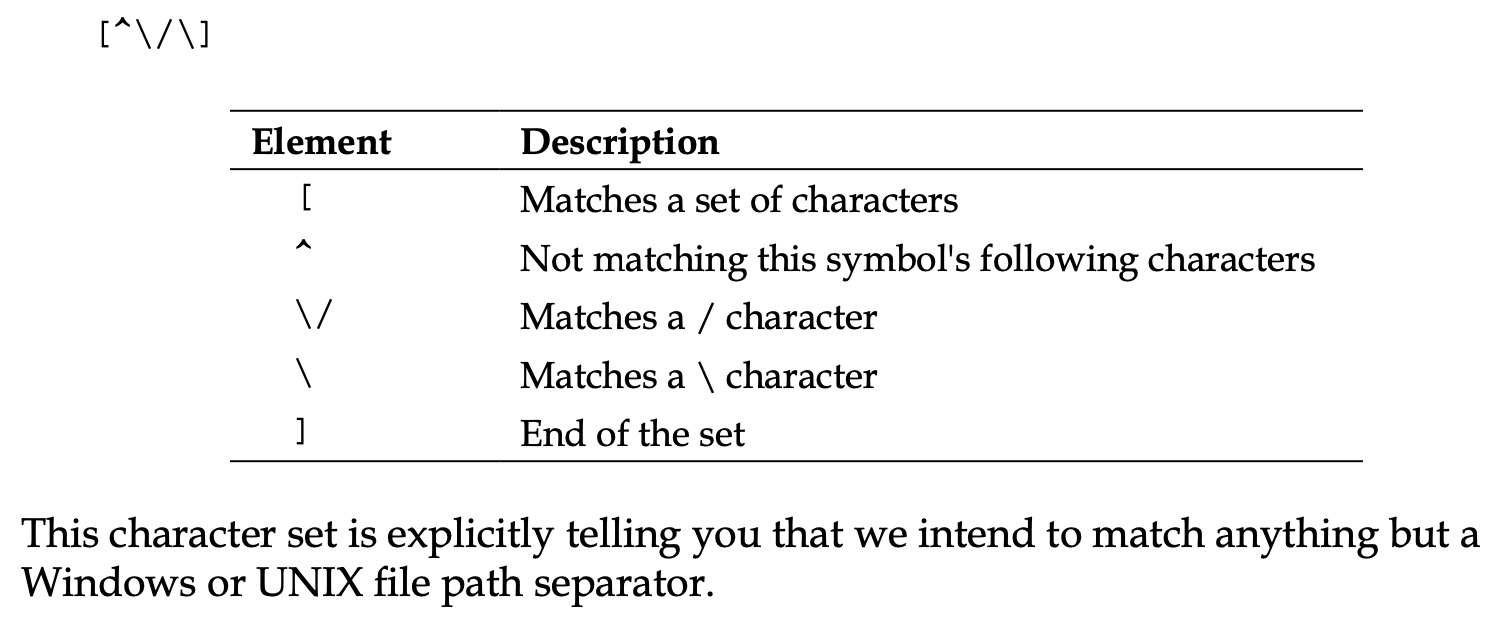

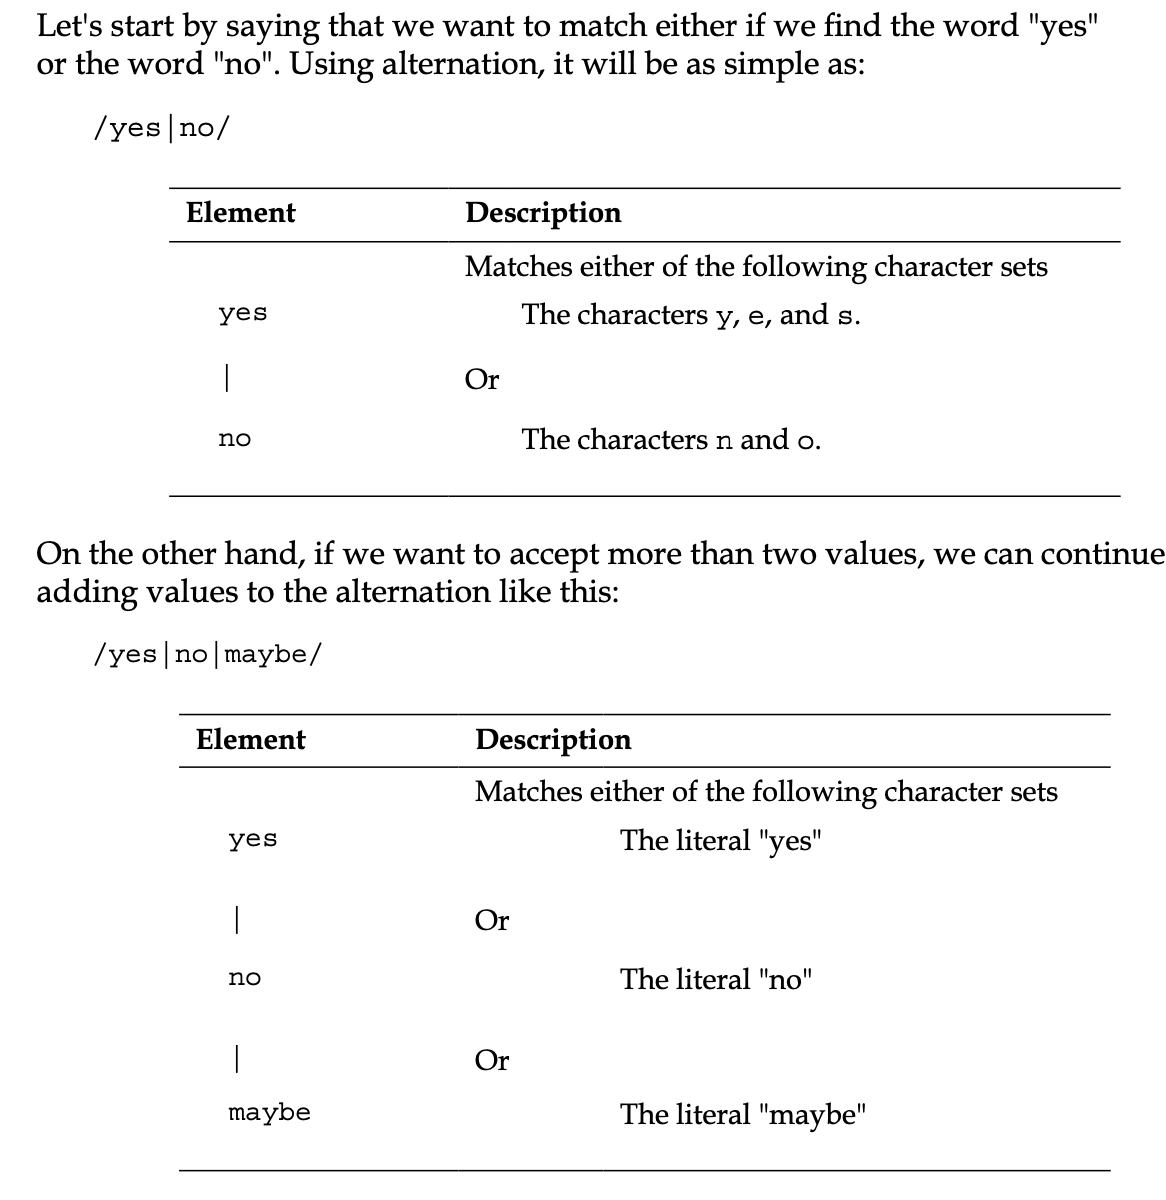

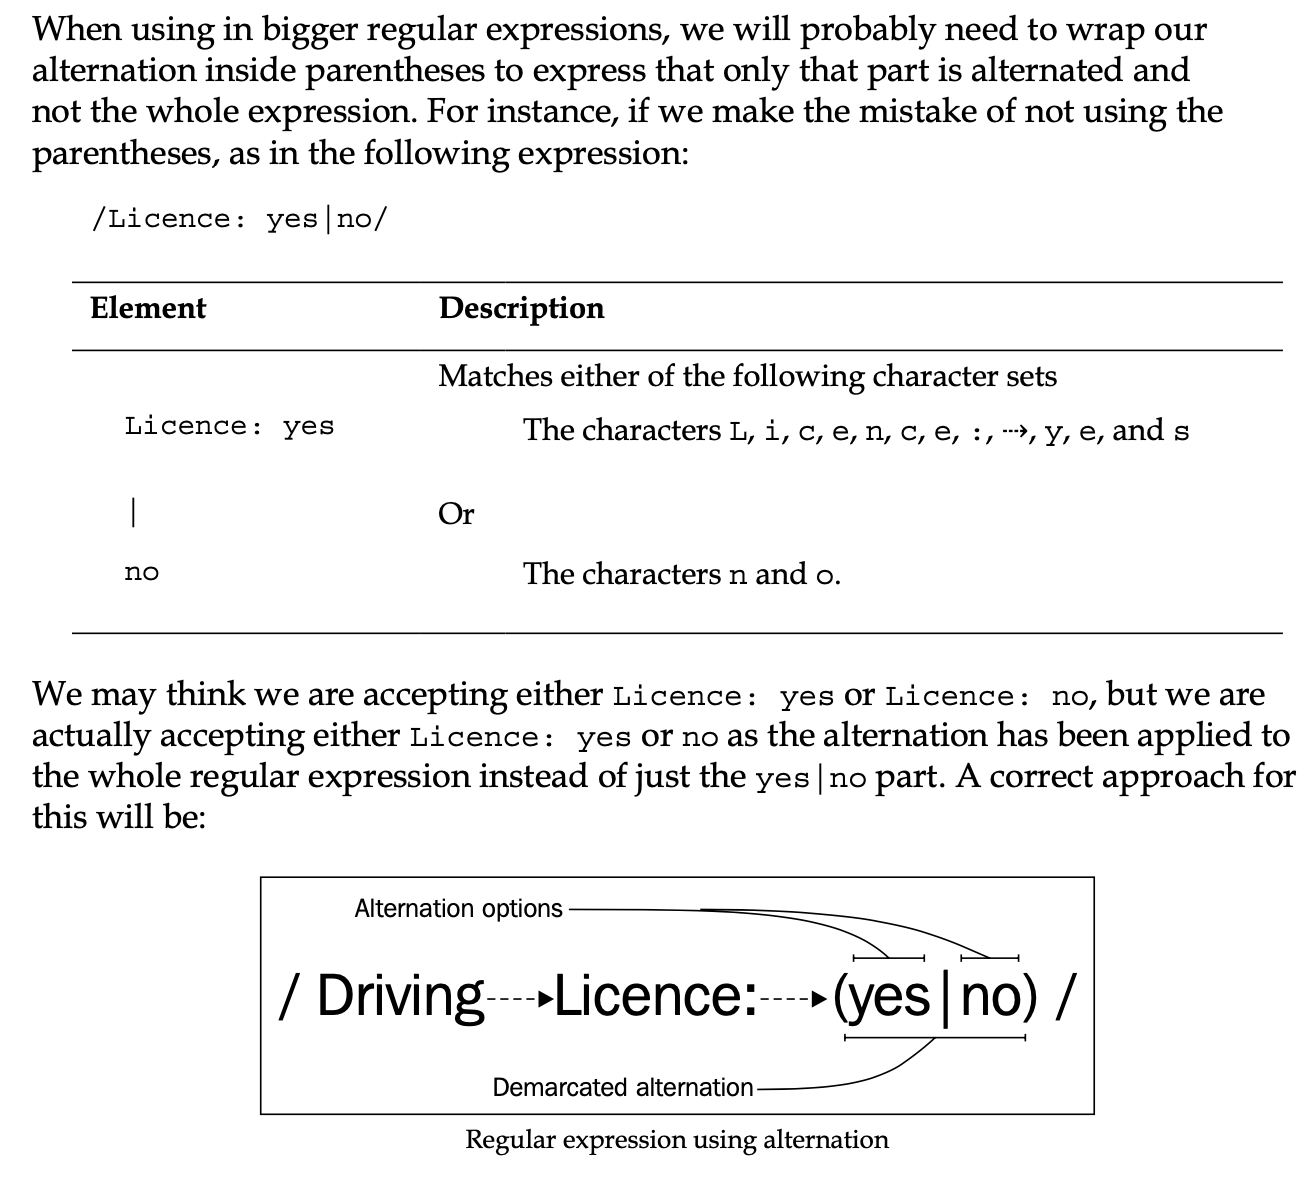

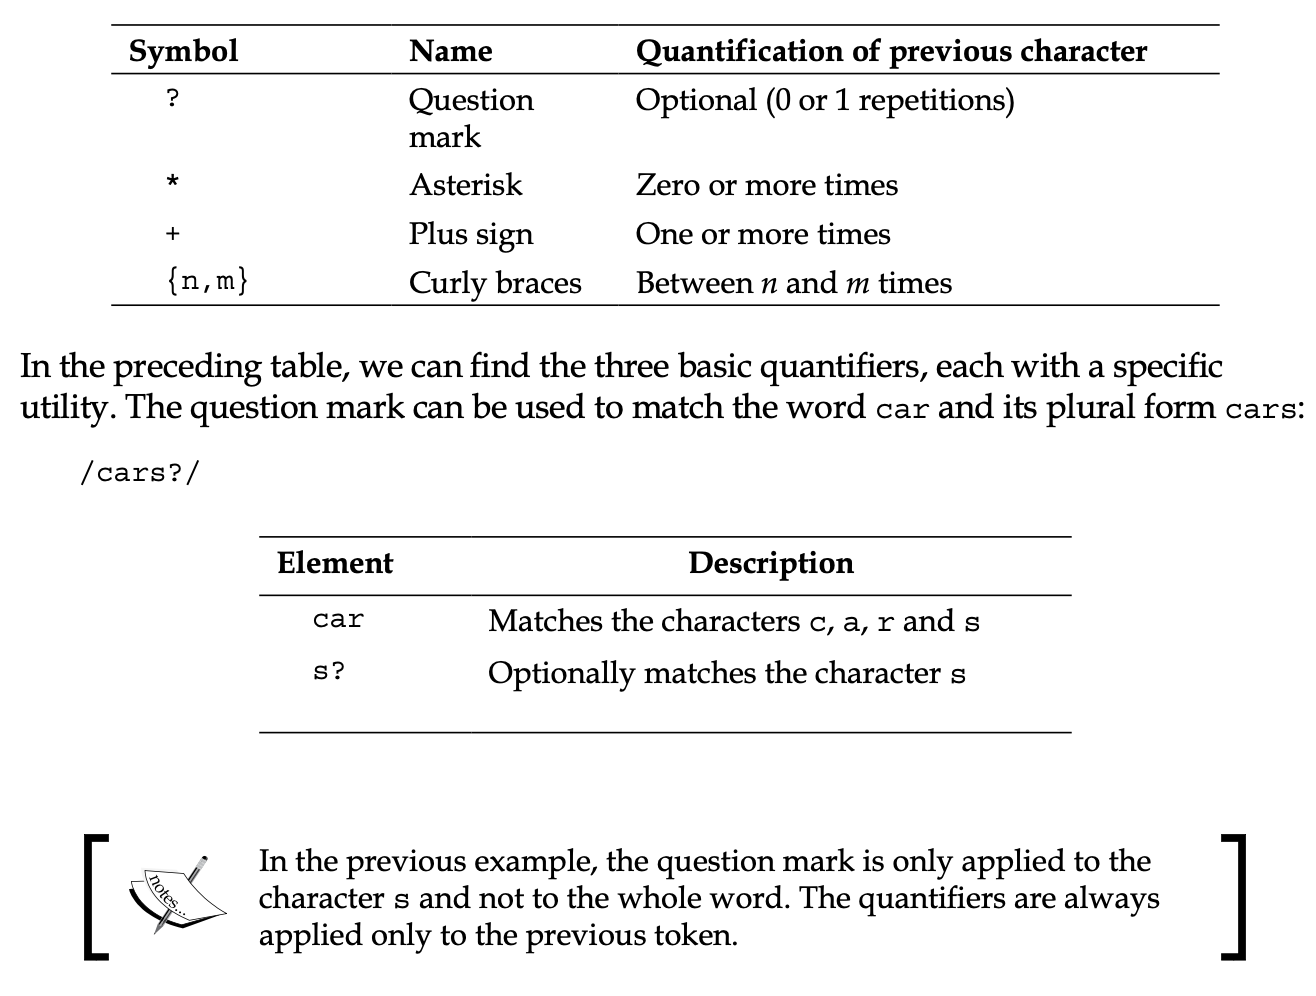

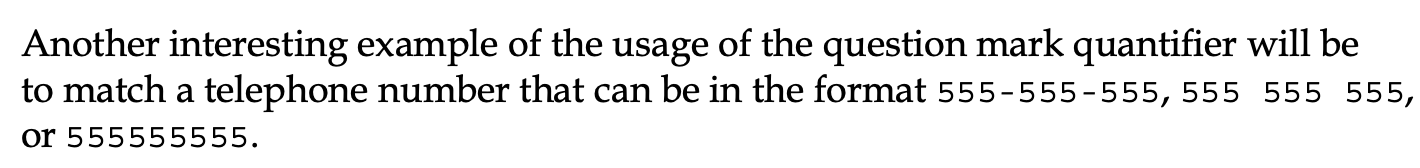

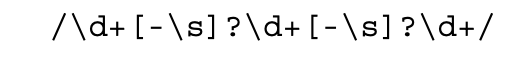

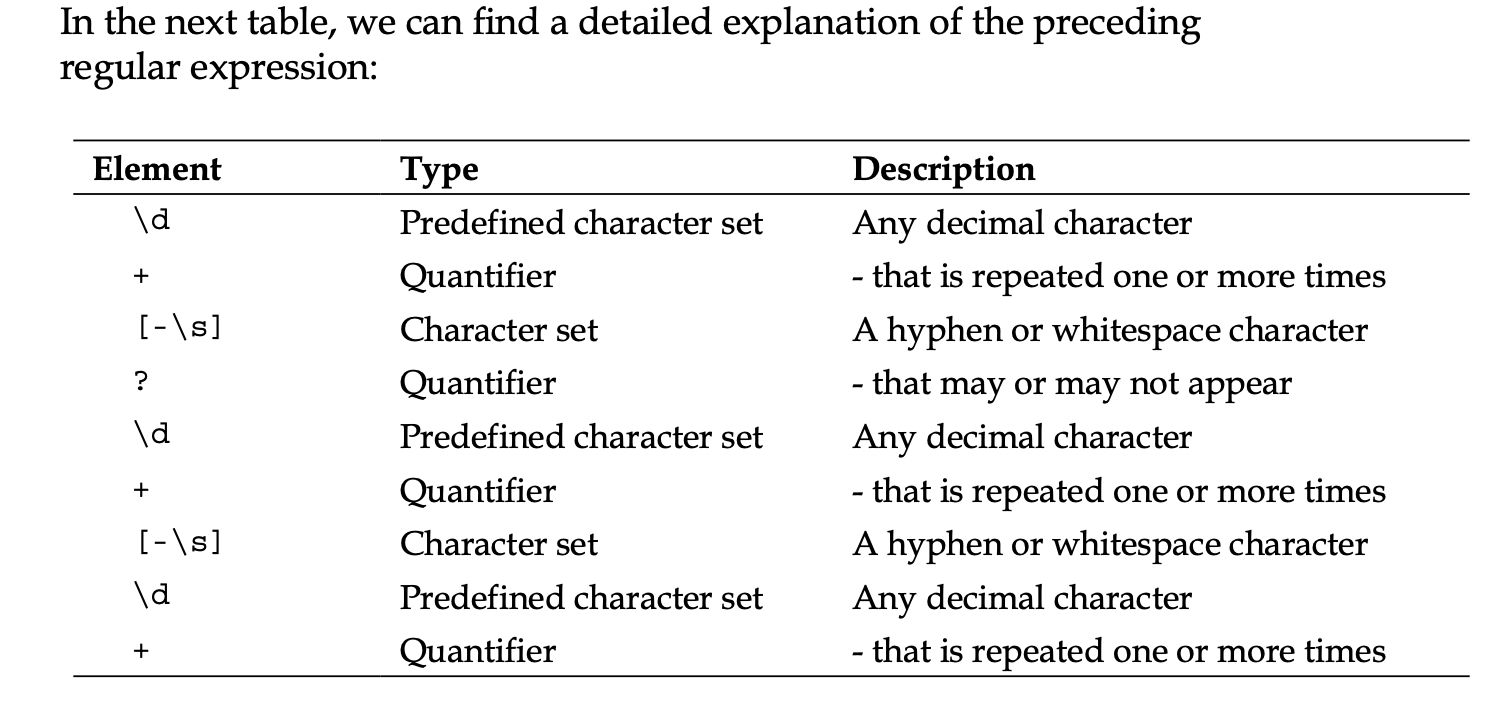

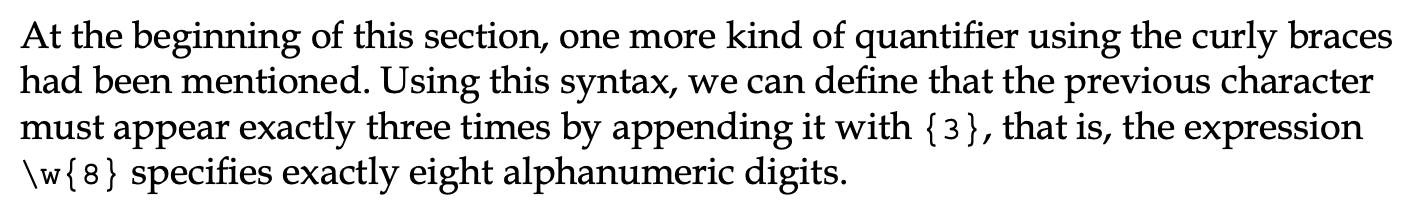

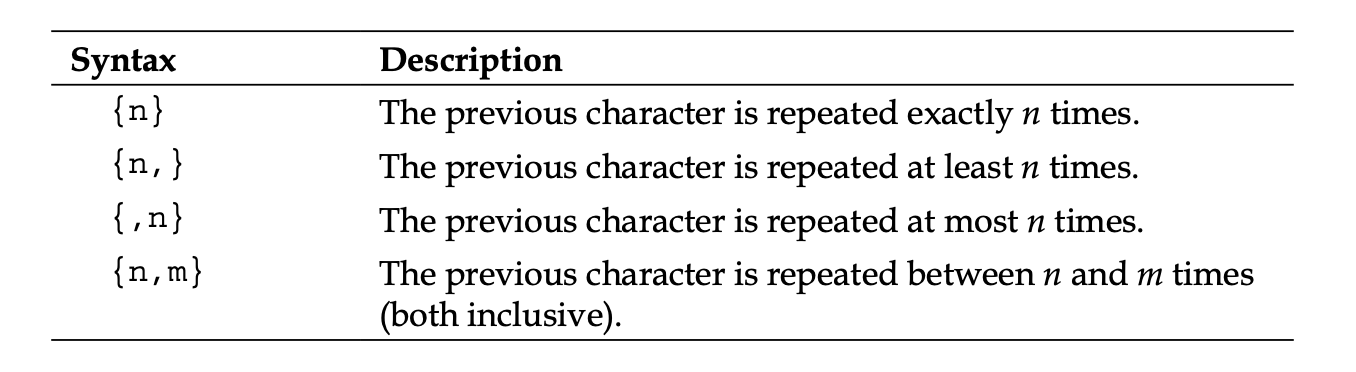

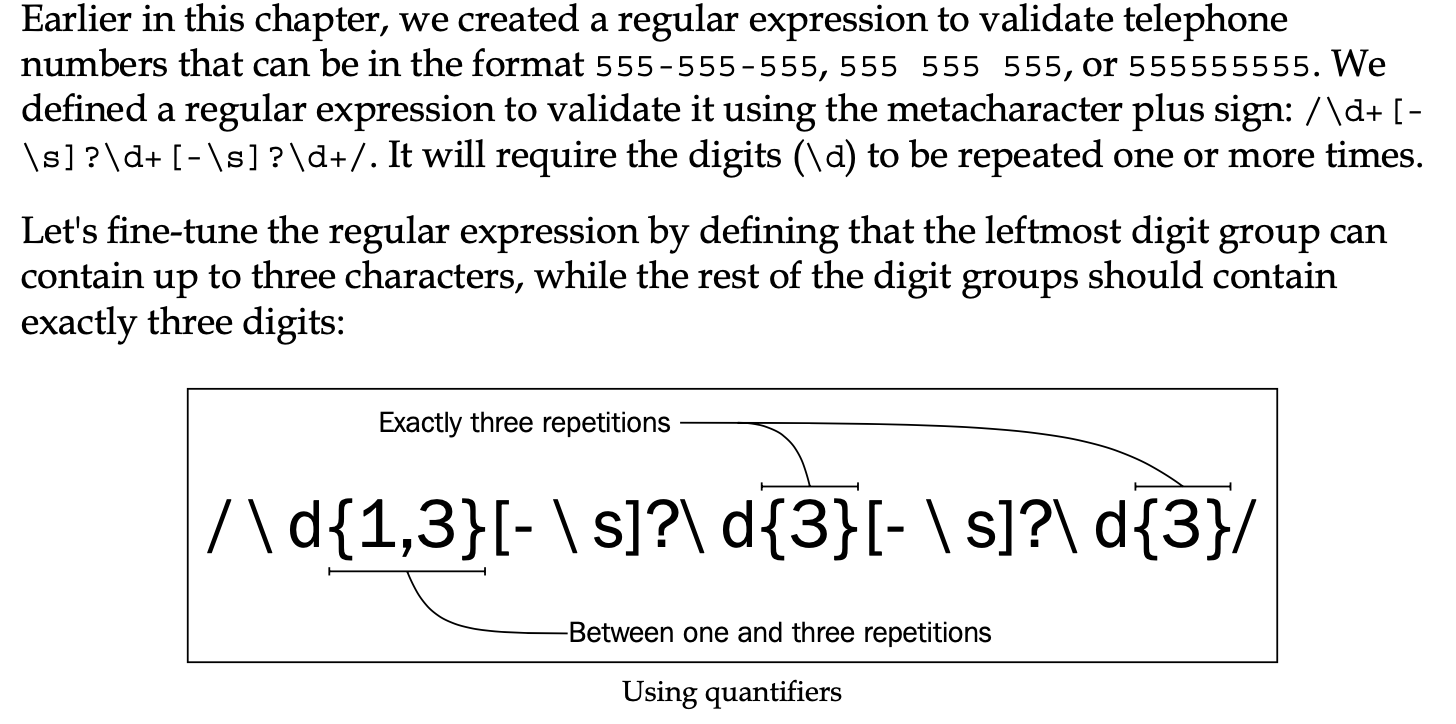

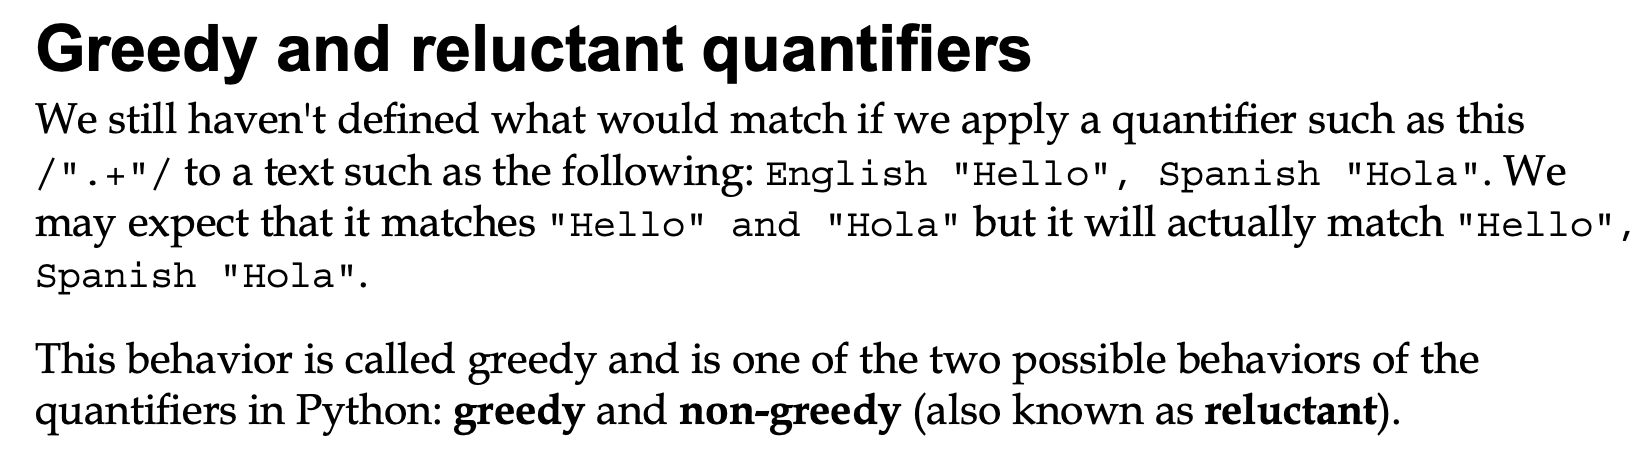

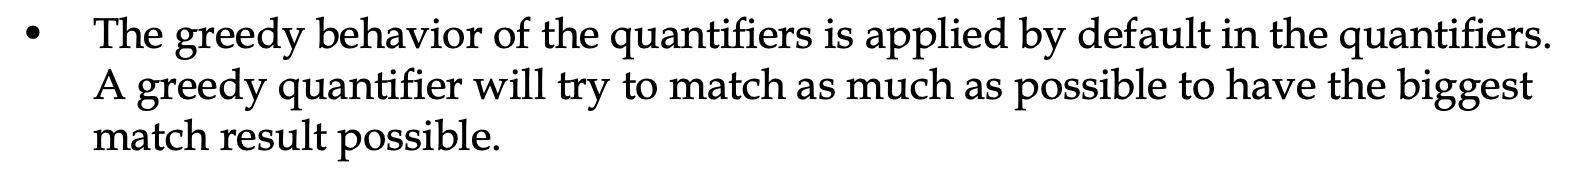

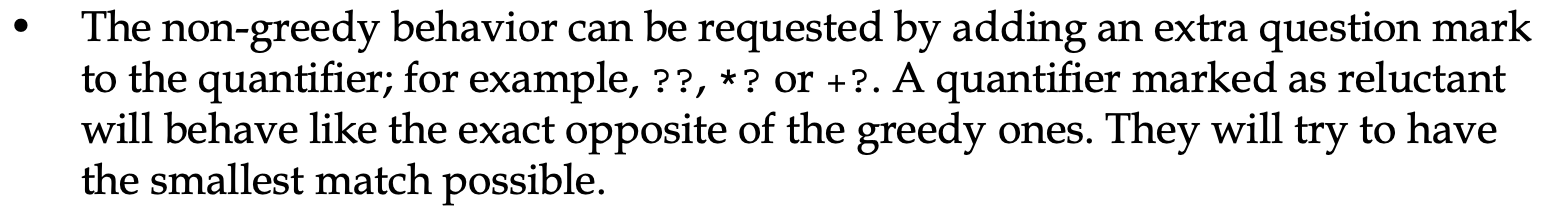

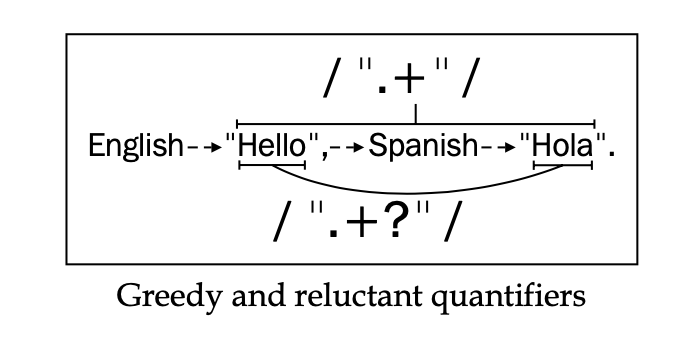

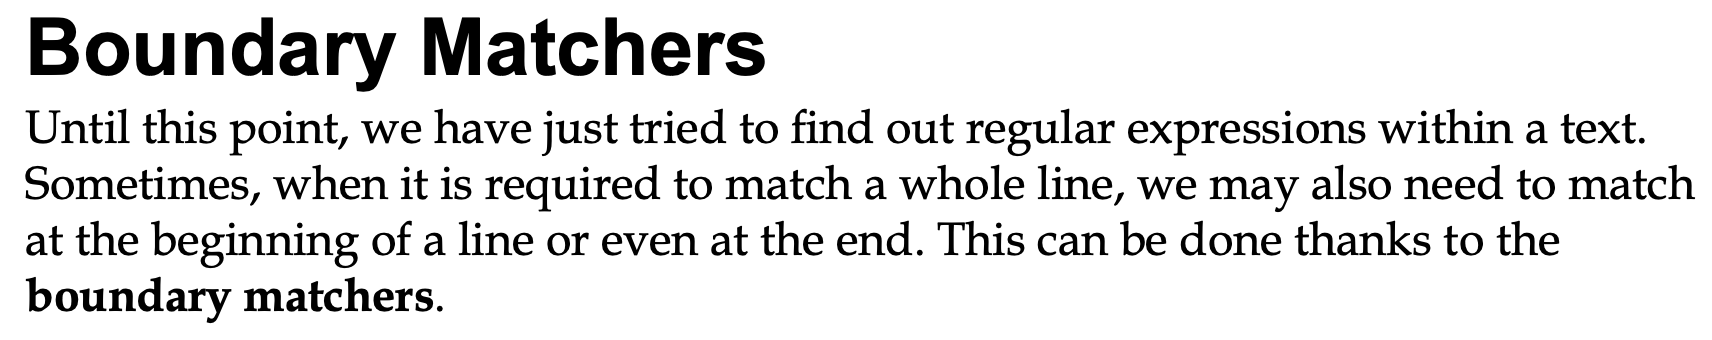

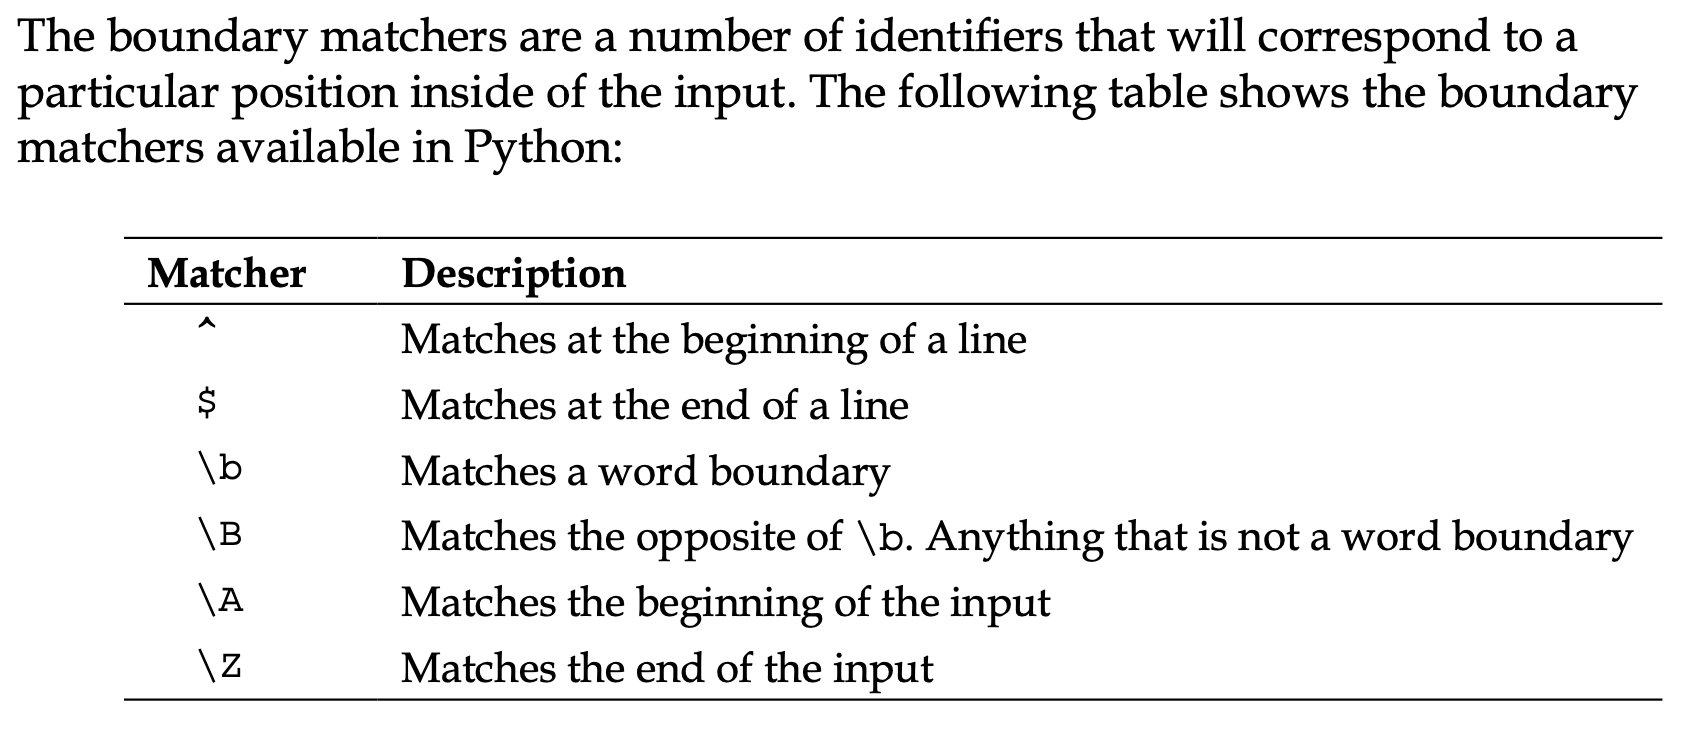

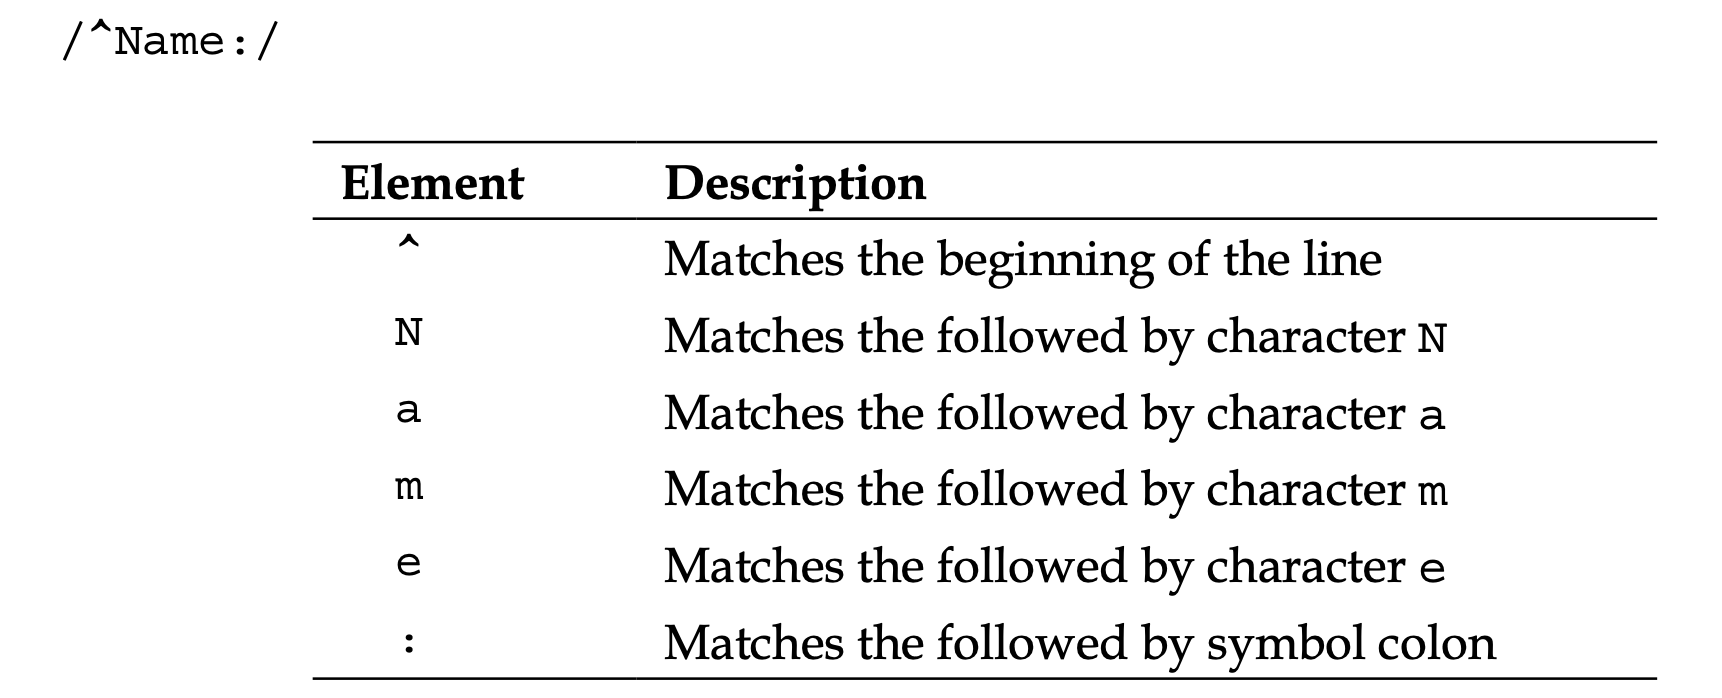

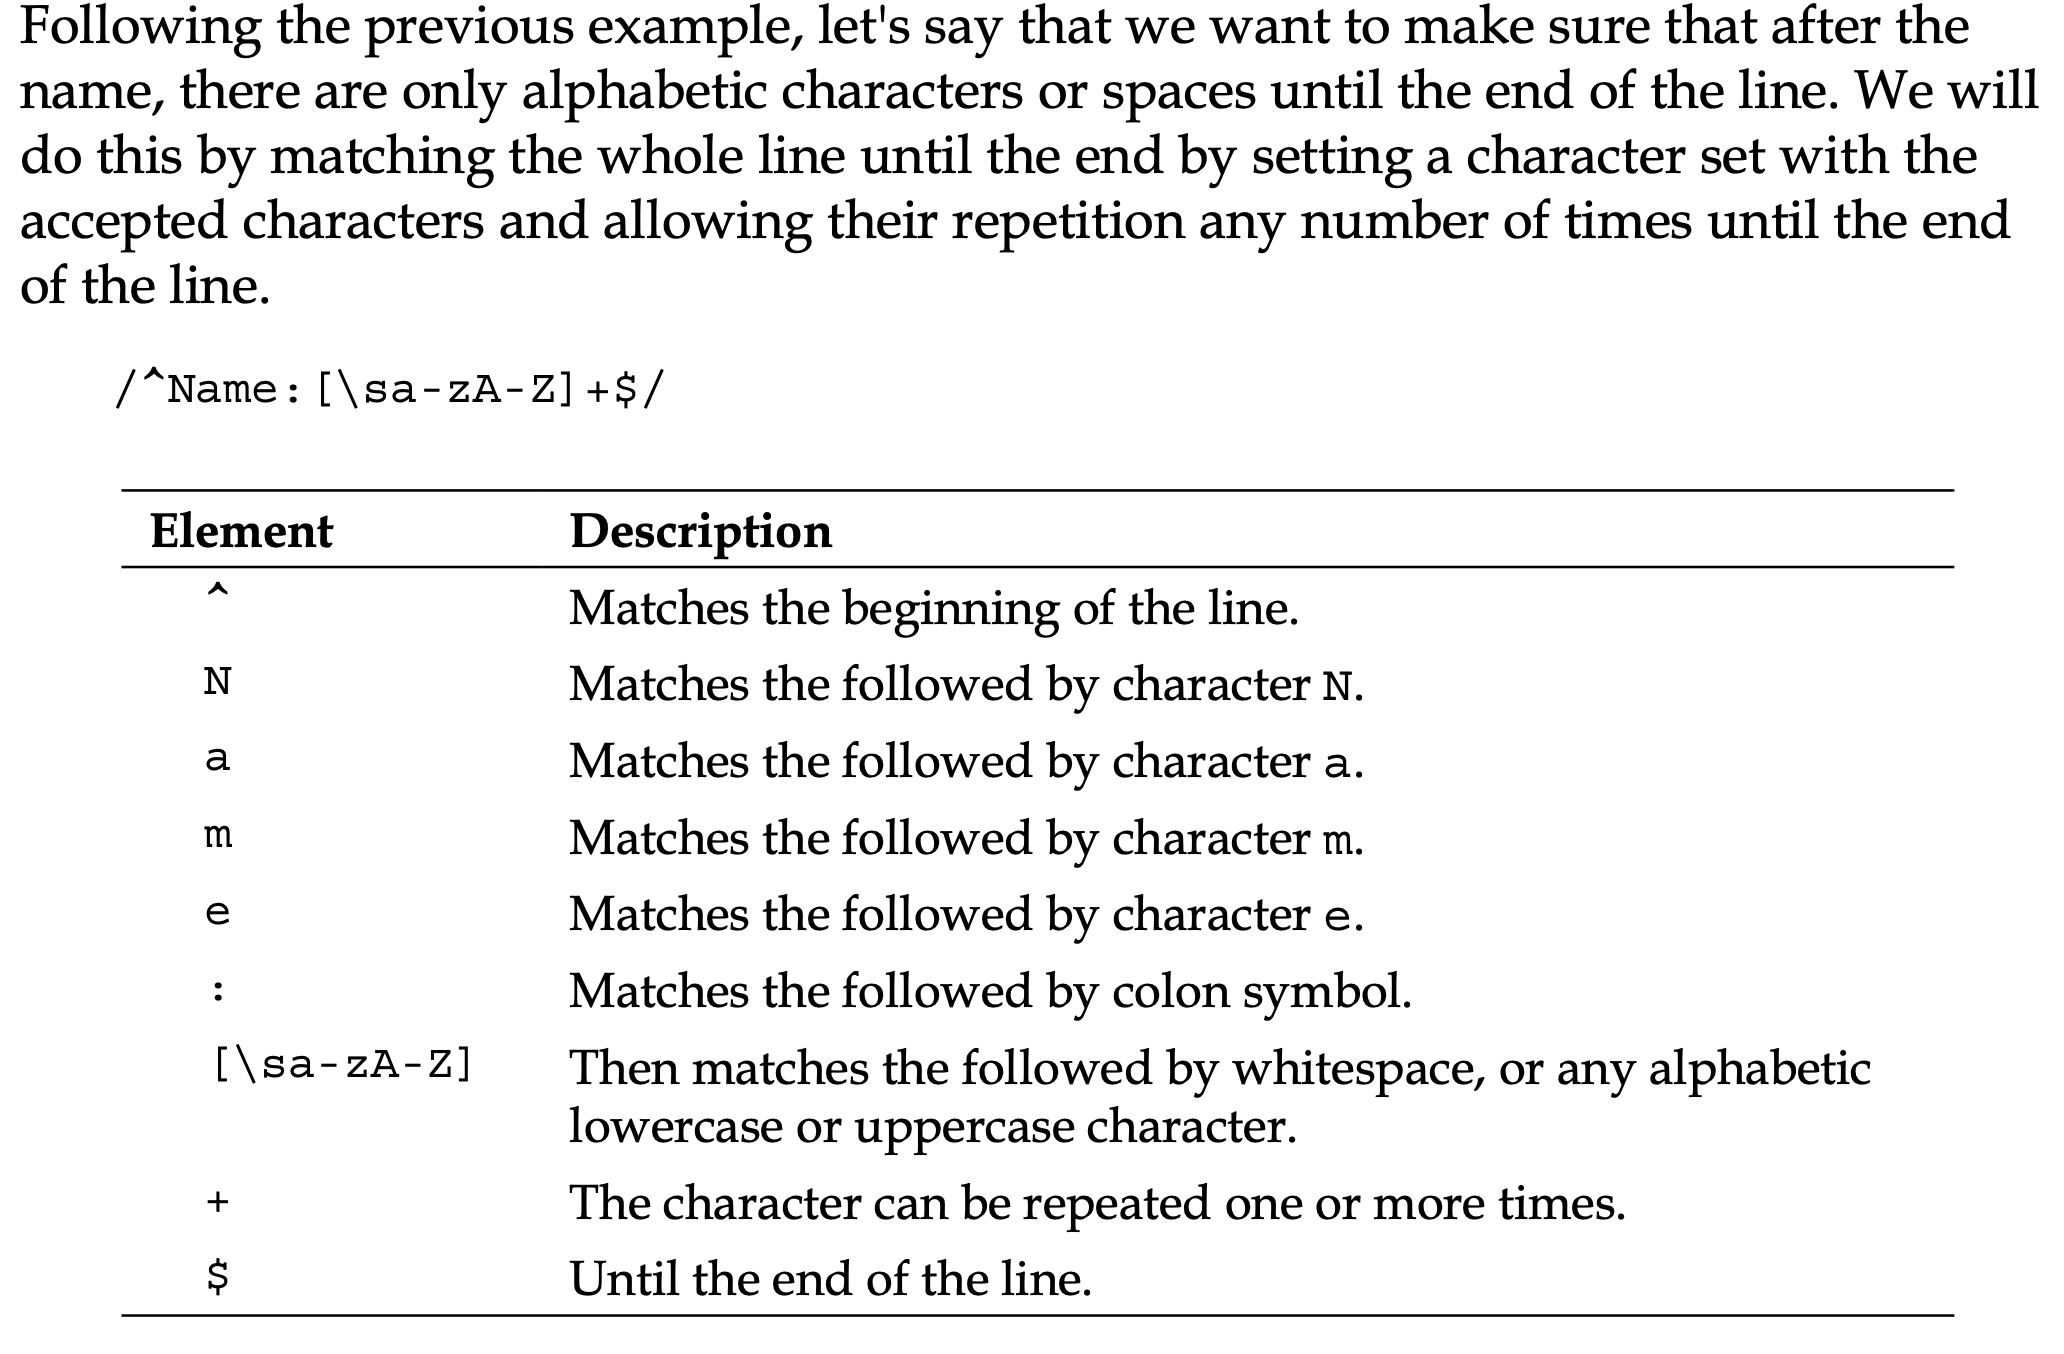

## Another outstanding boundary matcher is the word boundary \b. This is very useful when we want to work with isolated words and we don't want to create character sets with every single character that may divide our words (spaces, commas, colons, hyphens, and so on). We can, for instance, make sure that the word hello appears in a text by using the following regular expression:

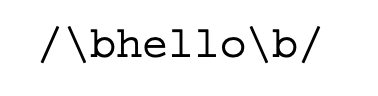

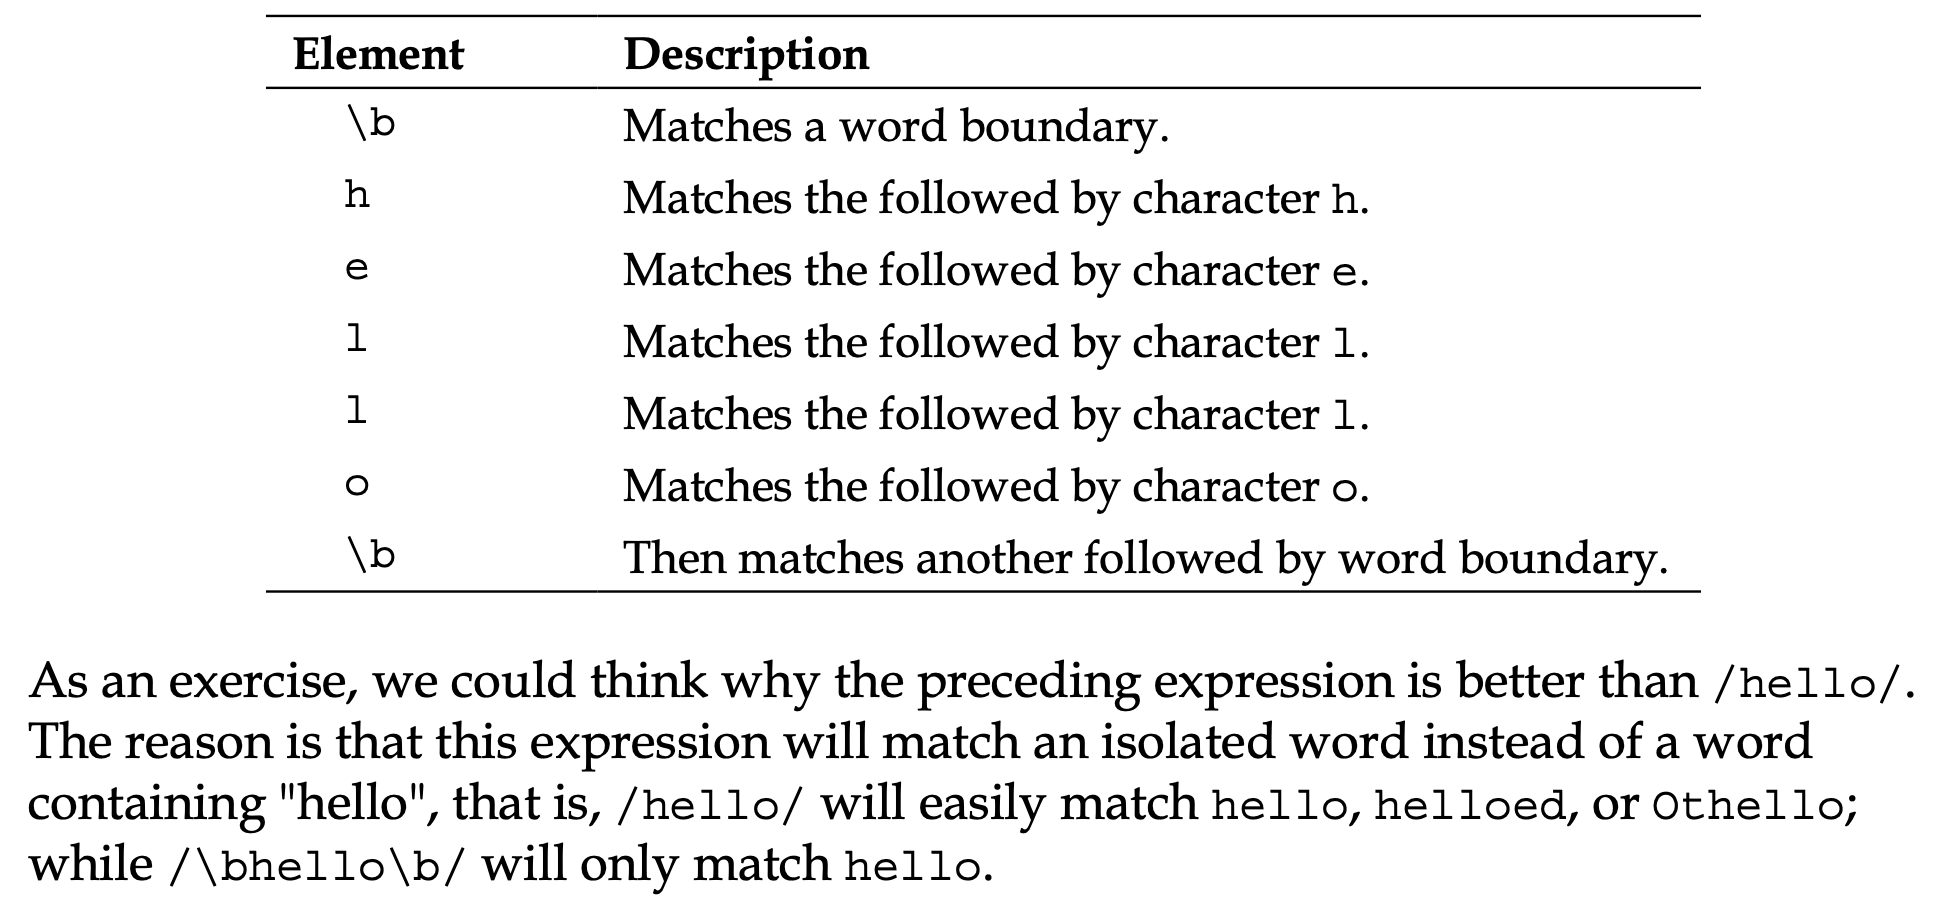

## Now we are ready to learn the 're' module of Python for Regular Expressions

In [43]:
import re

pattern1 = re.compile(r'\bfoo\b')

# Python provides the raw string notation r, 
# with which the backslashes are treated as normal characters. 
# So, r"\b" is not the backspace anymore; 
# it's just the character \ and the character b, and the same goes for r"\n".

# re.compile() takes a regular expression pattern as its argument and compiles it into a regular expression object.
# The compiled regular expression object can then be stored in a variable and reused multiple times.
# Compiling the regular expression pattern can improve the performance of matching operations, 
# especially when the pattern needs to be used multiple times.
# Once compiled, the regular expression object's methods, such as match(), search(), findall(), etc., 
# can be used to search for matches within strings.

pattern1.match("foo bar")

# <re.Match object>: This part indicates that the object is an instance of the re.Match class, 
#which represents a match between a regular expression pattern and a string.

# span=(0, 3): This part provides the indices of the matched substring within the original string. 
# In this case, (0, 3) indicates that the match occurred from index 0 (inclusive) to index 3 (exclusive) 
# in the original string.

# match='foo': This part shows the actual substring that matched the regular expression pattern. 
# In this case, it matched the substring 'foo' from the original string.

<re.Match object; span=(0, 3), match='foo'>

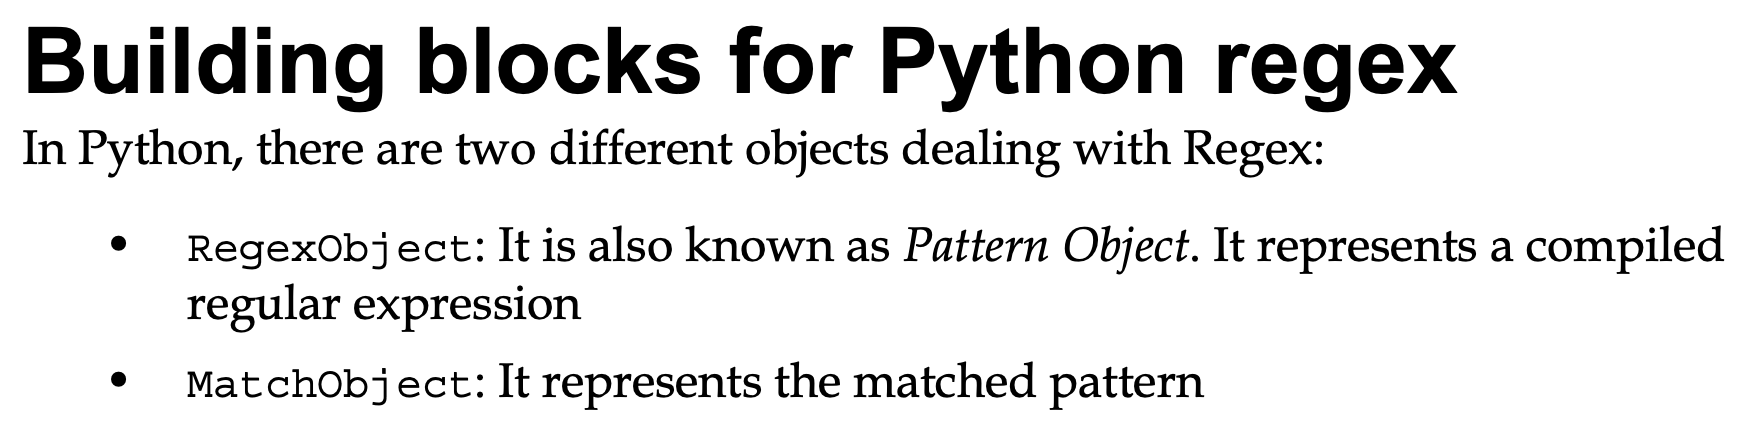

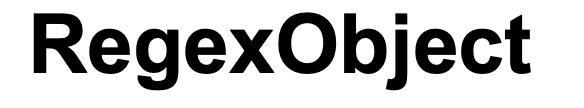

## In order to start matching patterns, we'll have to compile the regex. The result will be a pattern object or RegexObject. This object has several methods for typical operations on regular expressions. The compilation of a regular expression produces a reusable pattern object that provides all the operations that can be done, such as matching a pattern and finding all substrings that match a particular regex. 

In [44]:
# So, for example, if we want to know if a string starts with <HTML>, we can use the following code:

pattern2 = re.compile(r'<HTML>')
pattern2.match("<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [45]:
# If we want to re-use the regular expression, we can use the following code:
pattern2.match("<HTML><head>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [46]:
# On the other hand, we can directly perform the operation on the module using the following line of code:
re.match(r'<HTML>', "<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

## Internally, these wrappers create the RegexObject and then call the corresponding method. You might be wondering whether every time you call one of these wrappers it compiles the regular expression first. The answer is no. The re module caches the compiled pattern so that in future calls it doesn't have to compile it again.

## Beware of the memory needs of your program. When you're using module operations, you don't control the cache, and so you can end up with a lot of memory usage. You can always use re.purge to clear the cache but this is a tradeoff with performance. Using compiled patterns allows you to have a fine-grained control of the memory consumption because you can decide when to purge them.

In [47]:
re.purge()

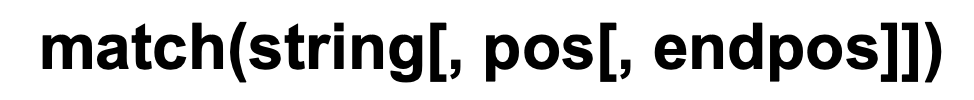

## This method tries to match the compiled pattern only at the beginning of the string. If there is a match, then it returns a MatchObject. 

In [48]:
# So, for example, let's try to match whether a string starts with <HTML> or not:
pattern3 = re.compile(r'<HTML>')
pattern3.match("<HTML><head>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [49]:
# Let's see what happens when the string doesn't start with <HTML>
pattern3.match("<head><HTML>")

# As you can see, there is no match. 
# Remember what we said before, match tries to match at the beginning of the string.

In [50]:
# let's use the search method
pattern3.search("<head><HTML>")

<re.Match object; span=(6, 12), match='<HTML>'>

In [51]:
# D--I--Y

pattern1.match("bar foo")




# It is because pattern.match searchers for pattern at the start of the string. Instead use pattern.search()

In [52]:
pattern1.search("bar foo")

<re.Match object; span=(4, 7), match='foo'>

In [53]:
pattern1.search("foo bar")

<re.Match object; span=(0, 3), match='foo'>

In [55]:
# The optional pos parameter specifies where to start searching

pattern1.match("bar foo",4)

<re.Match object; span=(4, 7), match='foo'>

In [60]:
# D--I--Y

pattern1.match("bar bar foo",6)

pattern1.match("bar bar foo",7)

pattern1.match("bar bar foo",8)

In [63]:
# Note that pos bigger than 0 doesn't mean that string starts at that index

pattern4 = re.compile(r'^<HTML>')

pattern4.match("<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [66]:
pattern4.match("<head> <HTML>", 7)

# There is no match because the pattern is trying to match the ^ metacharacter at the 7 position first,
# and not at the start of the string which ^ metacharacter indicates. 

In [68]:
# the following will work
pattern4.match("<head> <HTML>"[7:])

# The slice gives us a new string; therefore, there is a ^ metacharacter in it. 
# On the contrary, pos just moves the index to the starting point for the search in the string.

<re.Match object; span=(0, 6), match='<HTML>'>

In [70]:
# The second argument, endpos, sets how far the pattern will try to match in the string. 
pattern5 = re.compile(r'<HTML>')
                     
pattern5.match("<HTML>"[:2])

In [71]:
pattern5.match("<HTML>", 0, 2)

In [73]:
# D--I--Y

pattern5.match("<HTML>", 0, 6)

In [ ]:
# D--I--Y

pattern5.match("<HTML>"[:6])

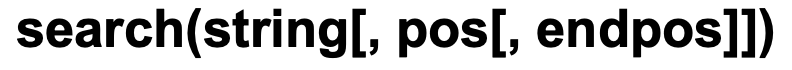

## It tries to match the pattern at any location of the string and not just at the beginning. If there is a match, it returns a MatchObject.

In [76]:
pattern6 = re.compile(r"world")

pattern6.search("hello world")

<re.Match object; span=(6, 11), match='world'>

In [93]:
# Note that with the MULTILINE flag, 
# the ^ symbol matches at the beginning of the string and at the beginning of each line 
pattern7 = re.compile(r'^<HTML>', re.MULTILINE)
pattern7.search("<HTML>")

<re.Match object; span=(0, 6), match='<HTML>'>

In [94]:
pattern7.search(" <HTML>")

In [ ]:
# D--I--Y

pattern7.search(" <HTML>"[1:])

In [104]:
# So, as long as the pos parameter is less than, or equal to, the new lines, there will be a match.
pattern7.search("  \n<HTML>",3)

<re.Match object; span=(3, 9), match='<HTML>'>

In [105]:
pattern7.search("  \n<HTML>",4)

In [109]:
# try with 13, 14, and 15
pattern7.search('</div></body>\n<HTML>',13)

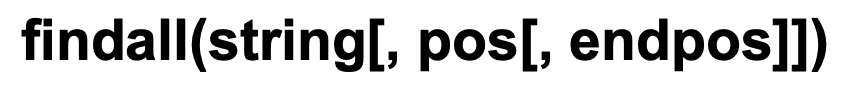

## findall it returns a list with all the non-overlapping occurrences of a pattern and not the MatchObject like search and match do.

In [122]:
# In the following example, we're looking for every word in a string. 
# So, we obtain a list in which every item is the pattern found, in this case a word.
pattern8 = re.compile(r'\w+')  
pattern8.findall("hello world")

['hello', 'world']

In [114]:
pattern9 = re.compile(r'[a-zA-Z0-9_]+')  # same effect as \w+
pattern9.findall("hello world")

['hello', 'world']

In [ ]:
# D--I--Y

pattern9 = re.compile(r'[a-zA-Z0-9_]')
pattern9.findall("hello world")

In [116]:
# Keep in mind that empty matches are a part of the result in findall list
pattern10 = re.compile(r'a*')
pattern10.findall("aba")

# First, the regex matches the character a, then it follows with b. 
# There is a match due to the * quantifier, the empty string. 
# After that, it matches another a and finally it tries to match $. 
# As we've mentioned before, even though you can't see $, it's a valid character for the regex engine.

['a', '', 'a', '']

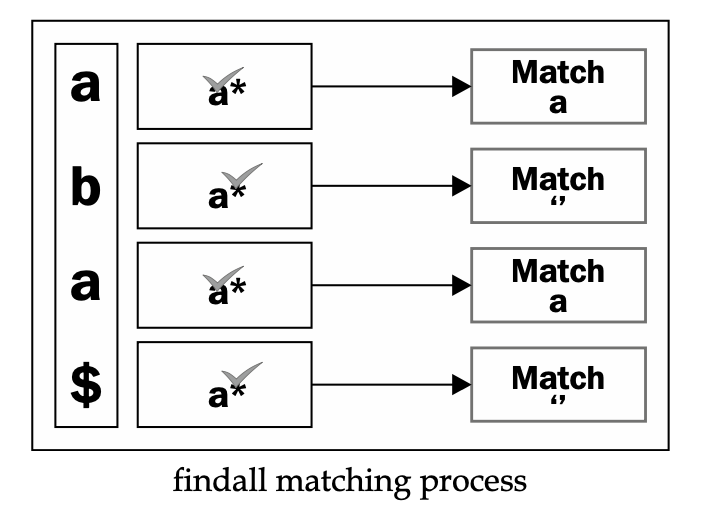

In [ ]:
# D--I--Y

pattern11 = re.compile(r'a?')
pattern11.findall("aba")

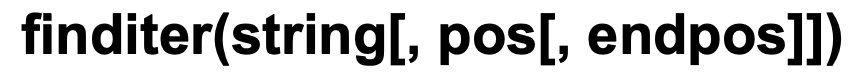

## Its working is essentially the same as findall, but it returns an iterator in which each element is a MatchObject, so we can use the operations provided by this object. So, it's quite useful when you need information for every match, for example the position in which the substring was matched.

In [130]:
pattern12 = re.compile(r'\w+')  
it = pattern12.finditer("hello world")

for match in it:
    print (match)
    print (match.span())
    

<re.Match object; span=(0, 5), match='hello'>
(0, 5)
<re.Match object; span=(6, 11), match='world'>
(6, 11)


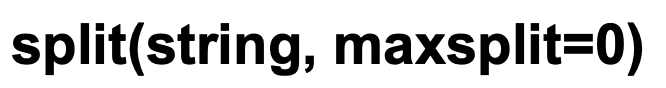

## In almost every language, you can find the split operation in strings. The big difference is that the split in the re module is more powerful due to which you can use a regex. So, in this case, the string is split based on the matches of the pattern. As always, the best way to understand it is with an example, so let's split a string into lines: 

In [131]:
re.split(r"\n", "Beautiful is better than ugly.\nExplicit is better than implicit.")

# In this example, the match is \n; so, the string is split using it as the separator

['Beautiful is better than ugly.', 'Explicit is better than implicit.']

In [133]:
# D--I--Y
# MAKE A PATTERN AND USE split() FUNCTION TO ACHIEVE THE SAME AS ABOVE



In [134]:
# Let's see another more interesting example

pattern13 = re.compile(r'\W')
pattern13.split('hello world')  # \W searches for any non-alpha numeric character, in this case, whitespace character

['hello', 'world']

In [ ]:
# D--I--Y

pattern13_0 = re.compile(r'\W')
ex_13_0 = pattern13_1.findall('hello world')
print (ex_13_0)
print ('-'*20)

pattern13_1 = re.compile(r'\W+')
ex_13_1 = pattern13_1.split('hello world')
print (ex_13_1)
print ('-'*20)

pattern13_2 = re.compile(r'\W?')
ex_13_2 = pattern13_2.split('hello world')
print (ex_13_2)
print ('-'*20)

pattern13_3 = re.compile(r'\W*')
ex_13_3 = pattern13_3.split('hello world')
print (ex_13_3)
print ('-'*20)

pattern13_4 = re.compile(r'\W{1}')
ex_13_4 = pattern13_4.split('hello world')
print (ex_13_4)
print ('-'*20)

pattern13_5 = re.compile(r'\W{1,}')
ex_13_5 = pattern13_5.split('hello world')
print (ex_13_5)
print ('-'*20)

pattern13_6 = re.compile(r'\W{,1}')
ex_13_6 = pattern13_6.split('hello world')
print (ex_13_6)
print ('-'*20)

In [143]:
# The maxsplit parameter specifies how many splits can be done at maximum and returns the remaining part in the result:

pattern14 = re.compile(r"\W")
pattern14.split("Beautiful is better than ugly", 2)

['Beautiful', 'is', 'better than ugly']

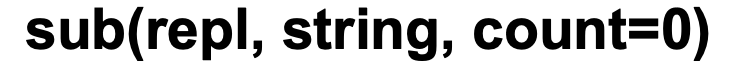

## repl is the pattern you are searching, string is the replacement 

## This operation returns the resulting string after replacing the matched pattern in the original string with the replacement. If the pattern is not found, the original string is returned.

In [144]:
pattern15 = re.compile(r'[0-9]+')
pattern15.sub("-", "order0 order1 order13")

# Basically, the regex matches 1 and more digits and replaces the pattern matched, 0, 1, and 13 here, with - (dash).

'order- order- order-'

In [145]:
pattern16 = re.compile(r'00')
pattern16.sub("-", "order00000")

'order--0'

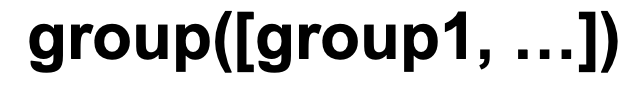

## The group operation gives you the subgroups of the match. If it's invoked with no arguments or zero, it will return the entire match; while if one or more group identifiers are passed, the corresponding groups' matches will be returned.

In [190]:
pattern17 = re.compile(r'(\w+) (\w+)')
match = pattern17.search("Hello world")
print (match)
print ('-'*15)
# You can see groups as group(1, lastGroup).
print (match.groups())
print ('-'*15)
print (match.group())
print ('-'*15)
print (match.group(0))
print ('-'*15)
print (match.group(1))
print ('-'*15)
print (match.group(2))
print ('-'*15)
print (match.group(0,2))
print ('-'*15)
print (match.group(3))

In [179]:
# D--I--Y
pattern18 = re.compile(r'(\w+) (\w+)')  
pm = pattern18.match("We live on Earth")
print (pm.groups())
print ('-'*15)
print (pm.group())
print ('-'*15)
print (pm.group(0))
print ('-'*15)
print (pm.group(1))
print ('-'*15)
print (pm.group(2))
print ('-'*15)
print (pm.group(3))
print ('-'*15)

In [181]:
# D--I--Y
pm = pattern18.search("We live on Earth")
print (pm.groups())
print ('-'*15)
print (pm.group())
print ('-'*15)
print (pm.group(0))
print ('-'*15)
print (pm.group(1))
print ('-'*15)
print (pm.group(2))
print ('-'*15)
print (pm.group(3))
print ('-'*15)

In [188]:
# D--I--Y
pm = pattern18.findall("We live on Earth")
print (pm)
print ('-'*15)
print (pm.groups())

In [195]:
# D--I--Y
pm = pattern18.finditer("We live on Earth")
print (pm)
print ('-'*15)
counter = 0
for i in pm:
    print (i)
    print (i.groups())
    print (i.group())

## We've already used groups in several examples shown above

## Grouping is accomplished through two metacharacters, the parentheses (). The simplest example of the use of parentheses would be building a subexpression.

In [215]:
# Imagine you have a list of products, 
# the ID for each product being made up of two or three sequences of 
# one digit followed by a dash and followed by one alphanumeric character, 1-a2-b
pattern19 = re.compile(r'(\d-\w)')
grp19 = pattern19.match('1-a2-b')
print (grp19.groups())
print ('-'*15)
grp19 = pattern19.search('1-a2-b')
print (grp19.groups())
print ('-'*15)  
grp19 = pattern19.findall('1-a2-b')
print (grp19)
print ('-'*15) 
print ('*'*30) 
pattern19 = re.compile(r'(\d-\w){2,3}')
grp19 = pattern19.match('1-a2-b')
print (grp19.groups())
print ('-'*15)
grp19 = pattern19.search('1-a2-b')
print (grp19.groups())
print ('-'*15)  
grp19 = pattern19.findall('1-a2-b')
print (grp19)
print ('-'*15) 


('1-a',)
---------------
('1-a',)
---------------
['1-a', '2-b']
---------------
******************************
('2-b',)
---------------
('2-b',)
---------------
['2-b']
---------------


In [316]:
# D--I--Y

# Create a group pattern to find whenever there is one or more 'ab' followed by 'c'
pattern20 = re.compile(r'(ab)+c')
print (pattern20.search('ababc'))
print (pattern20.search('abbc'))
print (pattern20.search('ababc').groups())
# So, you could use parentheses whenever you want to group meaningful subpatterns inside the main pattern.

<re.Match object; span=(0, 5), match='ababc'>
None
('ab',)


In [233]:
# For example, imagine you have a list of products, the IDs of which are made up
# of digits representing the country of the product, a dash as a separator, 
# and one or more alphanumeric characters as the ID in the DB. You're requested to extract the country codes:

pattern21 = re.compile(r"(\d+)-\w+")

it = pattern21.match("1-a\n20-baer\n34-afcr")
print (it.groups())
print ('-'*15)

it = pattern21.search("1-a\n20-baer\n34-afcr")
print (it.groups())
print ('-'*15)

it = pattern21.findall("1-a\n20-baer\n34-afcr")
print (it)
print ('-'*15)

it = pattern21.finditer("1-a\n20-baer\n34-afcr")
for i in it: 
    print (i.groups())  # the group you defined
    print (i.group(0))  # the whole match including the group
    print (i.group(1))  # the group you defined
    print ('*'*15)

# Remember that when working with the group method, 
# the index 0 returns the whole match, and the groups start at index 1.

('1',)
---------------
('1',)
---------------
['1', '20', '34']
---------------
('1',)
1-a
1
***************
('20',)
20-baer
20
***************
('34',)
34-afcr
34
***************


In [241]:
# Let's practice. For the give pattern21, apply match, search, findall, finditer to the string 'Hello World hola earth'

pattern21 = re.compile(r"(\w+) (\w+)")


In [247]:
# We will now learn named groups, where you can give names to groups. 

# In order to use it, we have to use the syntax,(?P<name>pattern)

pattern22 = re.compile(r"(?P<first>\w+) (?P<second>\w+)")
match = pattern22.search("Hello world ")
print (match.groups())
print (match.group("first"))
print (match.group("second"))

('Hello', 'world')
Hello
world


In [264]:
pattern22 = re.compile(r"(?P<first>\w+) (?P<second>\w+)")
match = pattern22.search("Hello world Hi Earth") # search do not find Hi Earth
print (match.groups())
print (match.group("first"))
print (match.group("second"))
print ('-'*15)
match = pattern22.findall("Hello world Hi Earth") # findall returns a list with matched pattern and not groups
print (match)
print ('-'*15)
match = pattern22.finditer("Hello world Hi Earth") # finditer returns groups and can be accessed with names
for i in match: 
    print (i.group('first'))
    print (i.group('second'))

('Hello', 'world')
Hello
world
---------------
[('Hello', 'world'), ('Hi', 'Earth')]
---------------
Hello
world
Hi
Earth


In [322]:
# Non-capturing groups
# ?: is used when you want to group an expression, 
# but you do not want to save it as a matched/captured portion of the string.

# group example
print (re.search("Españ(a|ol)", "Español"))
print (re.search("Españ(a|ol)", "Español").groups())
print (re.search("Españ(?P<language>a|ol)", "Español").groups())  # group is named

# non-capturing group
print (re.search("Españ(?:a|ol)", "Español"))
print (re.search("Españ(?:a|ol)", "Español").groups()) # no group is captured. 

<re.Match object; span=(0, 7), match='Español'>
('ol',)
('ol',)
<re.Match object; span=(0, 7), match='Español'>
()


In [330]:
# Overlapping Groups

# let's take an example

re.findall(r'(a|b)+', 'abaca')  # what do you think is the output?

# is it 'aba'and 'a'

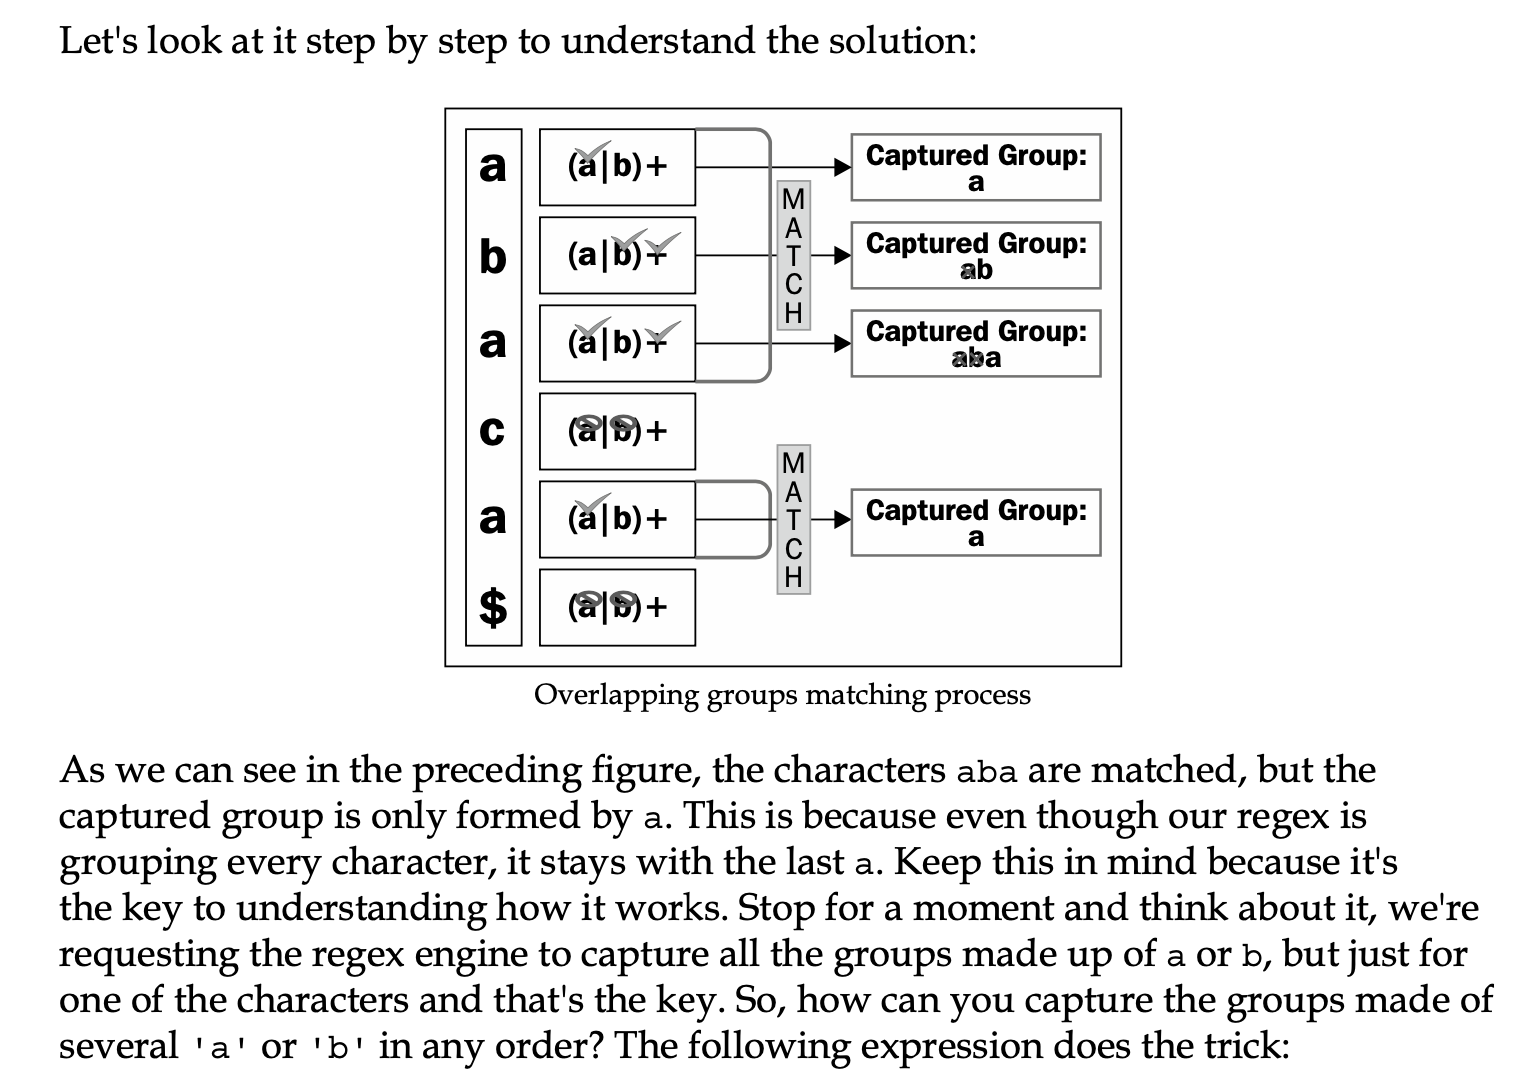

In [331]:
re.findall(r'((?:a|b)+)', 'abaca')   # ?: does not capture groups so we get what we wish for

['aba', 'a']

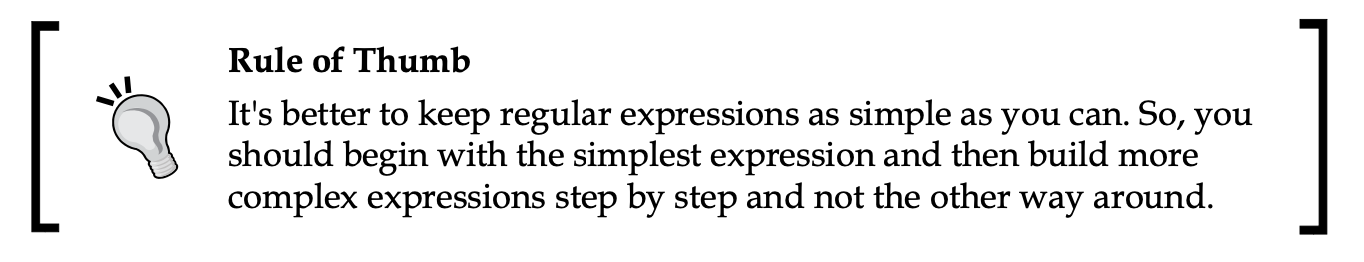

In [273]:
# Let's do some exercises related to all that we have learnt so far

# Ex.1
# Write a pattern to find date in the following string
ex1_string = "Today's date is 03/29/2024"
pattern_ex1 = re.compile(---fill_in_your_pattern---) 
capture = pattern_ex1.search(ex1_string)
print (capture)

In [274]:
# Ex.2
# Write a pattern to find phone number in the following string
ex2_string = "Contact me at 123-456-7890"
pattern_ex2 = re.compile(---fill_in_your_pattern---) 
capture = pattern_ex2.search(ex2_string)
print (capture)

<re.Match object; span=(14, 26), match='123-456-7890'>


In [278]:
# Ex.3
# Write a pattern to find email in the following string
ex3_string = "My email is example@email.com"
pattern_ex3 = re.compile(---fill_in_your_pattern---) 
capture = pattern_ex3.search(ex3_string)
print (capture)

In [ ]:
# Ex.4
# Write a pattern to find email in the following string
ex3_string = "My email is example@email.com"
pattern_ex3 = re.compile(---fill_in_your_pattern---) 
capture = pattern_ex3.search(ex3_string)
print (capture)

In [328]:
# Ex.4
# Write a pattern to match the url. Use non-capturing group concept to create the pattern.
ex4_string = "Visit our website at https://example.com"
pattern_ex4 = re.compile(---fill_in_your_pattern---) 
capture = pattern_ex4.search(ex4_string)
print (capture)

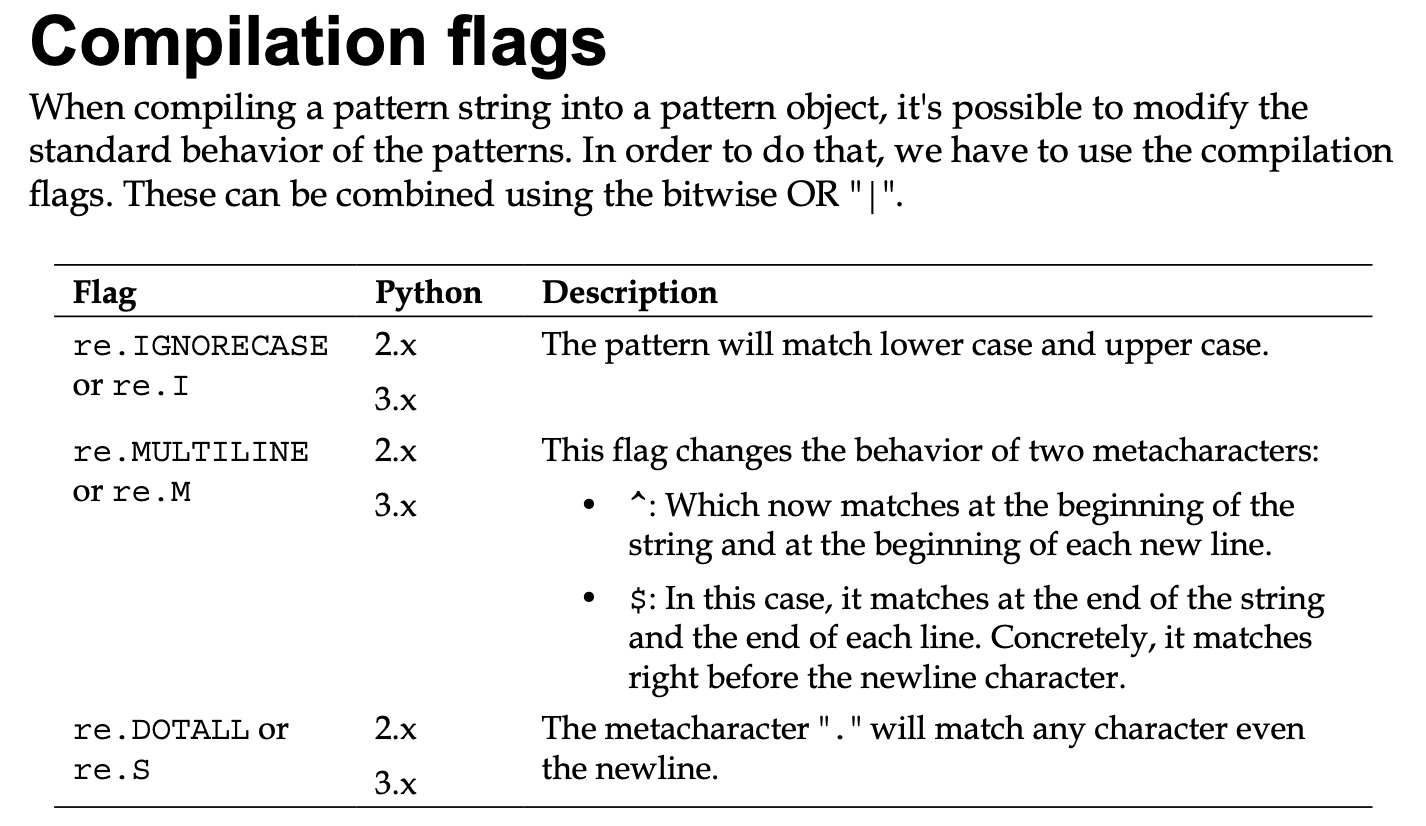

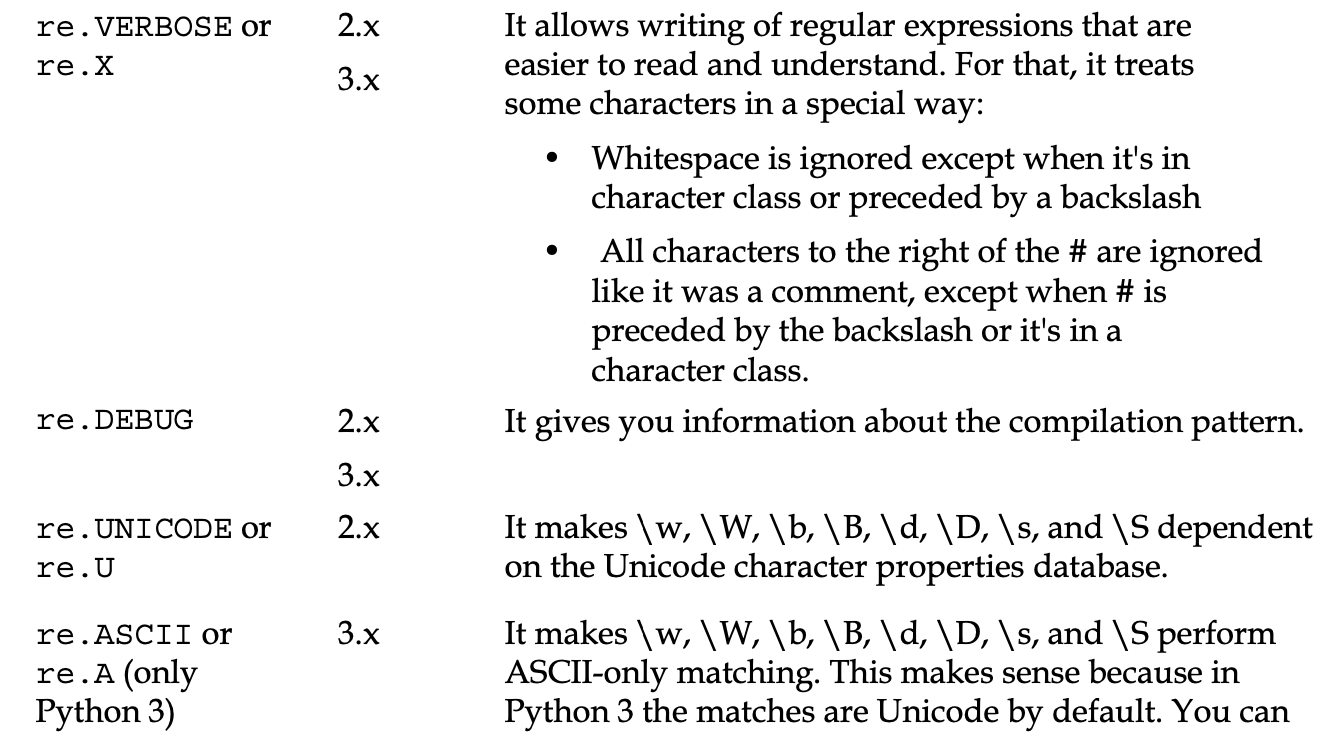

In [332]:
# re.IGNORECASE or re.I

pattern = re.compile(r"[a-z]+", re.I)
print (pattern.search("Felix")) # pattern matches even though the string starts with A and not with an a.
print (pattern.search("felix"))

<re.Match object; span=(0, 5), match='Felix'>
<re.Match object; span=(0, 5), match='felix'>


In [337]:
# re.MULTILINE or re.M

# pattern doesn't match the date after newline because we're not using the flag:
pattern = re.compile("^\w+\: (\w+/\w+/\w+)")
print (pattern.findall("date: 30/03/2024 \ndate: 31/03/2024)"))

print ('-'*15)

# However, on using the Multiline flag, it matches the two dates:
pattern = re.compile("^\w+\: (\w+/\w+/\w+)",re.M)
print (pattern.findall("date: 30/03/2024 \ndate: 31/03/2024)"))
                      

['30/03/2024']
---------------
['30/03/2024', '31/03/2024']


In [339]:
# re.DOTALL or re.S
print (re.findall("^\d(.)", "1\ne")) # . is the group here, so pattern matches anything but here new line is not matched

print ('-'*15)

print (re.findall("^\d(.)", "1\ne",re.S))


[]
---------------
['\n']


In [343]:
# re.UNICODE or re.U

print (re.findall("\w+", "this is an example"))

print ('-'*15)

# But what would happen if we want to do the same with other languages? 
# The alphanumeric characters depend on the language, so we need to indicate it to the regex engine:
print (re.findall(u"\w+", u"这是一个例子", re.UNICODE))
print ('-'*15)
re.findall(u"\w+", u"لاثم اذه", re.UNICODE) 

['this', 'is', 'an', 'example']
---------------
['这是一个例子']
---------------


['لاثم', 'اذه']